# Billboard Data Exploration in R
### First install R kernel if not already installed:
Run this in R console:
```r
install.packages('IRkernel')
IRkernel::installspec()
```

In [23]:
# Install required packages (run once)
packages <- c("tidyverse", "ggplot2", "tidytext", "wordcloud", "gridExtra", "corrplot")
new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

In [24]:
# Load libraries
library(tidyverse)
library(ggplot2)
library(tidytext)
library(wordcloud)
library(gridExtra)

In [25]:
# Diagnostic: Show current working directory
cat("Current working directory:", getwd(), "\n\n")

# Check if file exists at expected location
if (file.exists("../data/billboard_24years_lyrics_spotify.csv")) {
  cat("✓ File found at: ../data/billboard_24years_lyrics_spotify.csv\n")
  df <- read.csv("../data/billboard_24years_lyrics_spotify.csv", stringsAsFactors = FALSE)
} else {
  cat("✗ File NOT found at: ../data/billboard_24years_lyrics_spotify.csv\n")
  cat("\nChecking alternative locations...\n")
  
  # Try from project root
  if (file.exists("data/billboard_24years_lyrics_spotify.csv")) {
    cat("✓ File found at: data/billboard_24years_lyrics_spotify.csv\n")
    df <- read.csv("data/billboard_24years_lyrics_spotify.csv", stringsAsFactors = FALSE)
  } else {
    stop("Cannot find data file. Please check your working directory.")
  }
}

# Basic exploration
cat("\nDataset shape:", dim(df), "\n")
cat("Columns:", names(df), "\n\n")

# Display first few rows (excluding lyrics column)
head(df %>% select(-lyrics))

Current working directory: /Users/lorenzogarduno/Documents/datasci:vis/exploration 

<U+2713> File found at: ../data/billboard_24years_lyrics_spotify.csv

Dataset shape: 3397 26 
Columns: ranking song band_singer songurl titletext url year lyrics uri danceability energy key loudness mode speechiness acousticness instrumentalness liveness valence tempo type id track_href analysis_url duration_ms time_signature 



,ranking,song,band_singer,songurl,titletext,url,year,uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,Breathe,Faith Hill,/wiki/Breathe_(Faith_Hill_song),Breathe,/wiki/Faith_Hill,2000,spotify:track:3y4LxiYMgDl4RethdzpmNe,0.529,0.496,...,0.00e+00,0.2510,0.278,136.859,audio_features,3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/tracks/3y4LxiYMgDl4RethdzpmNe,https://api.spotify.com/v1/audio-analysis/3y4LxiYMgDl4RethdzpmNe,250547,4
2,2,Smooth,Santana,/wiki/Smooth_(Santana_song),Smooth,/wiki/Santana_(band),2000,spotify:track:0n2SEXB2qoRQg171q7XqeW,0.609,0.923,...,4.73e-06,0.2950,0.961,115.996,audio_features,0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/tracks/0n2SEXB2qoRQg171q7XqeW,https://api.spotify.com/v1/audio-analysis/0n2SEXB2qoRQg171q7XqeW,294987,4
3,2,Smooth,Rob Thomas,/wiki/Smooth_(Santana_song),Smooth,/wiki/Rob_Thomas_(musician),2000,spotify:track:5IALWUYK0zDSEmZgb4ICvc,0.590,0.637,...,8.07e-01,0.2990,0.724,115.983,audio_features,5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/tracks/5IALWUYK0zDSEmZgb4ICvc,https://api.spotify.com/v1/audio-analysis/5IALWUYK0zDSEmZgb4ICvc,244924,4
4,3,Maria Maria,Santana,/wiki/Maria_Maria,Maria Maria,/wiki/Santana_(band),2000,spotify:track:3XKIUb7HzIF1Vu9usunMzc,0.777,0.601,...,2.01e-03,0.0348,0.680,97.911,audio_features,3XKIUb7HzIF1Vu9usunMzc,https://api.spotify.com/v1/tracks/3XKIUb7HzIF1Vu9usunMzc,https://api.spotify.com/v1/audio-analysis/3XKIUb7HzIF1Vu9usunMzc,261973,4
5,3,Maria Maria,The Product G&B,/wiki/Maria_Maria,Maria Maria,/wiki/The_Product_G%26B,2000,spotify:track:3XKIUb7HzIF1Vu9usunMzc,NA,NA,...,NA,NA,NA,NA,,,,,NA,NA
6,4,I Wanna Know,Joe,/wiki/I_Wanna_Know_(Joe_song),I Wanna Know,/wiki/Joe_(singer),2000,spotify:track:1m2xMsxbtxv21Brome189p,0.725,0.487,...,1.09e-05,0.4310,0.599,136.086,audio_features,1m2xMsxbtxv21Brome189p,https://api.spotify.com/v1/tracks/1m2xMsxbtxv21Brome189p,https://api.spotify.com/v1/audio-analysis/1m2xMsxbtxv21Brome189p,296693,4


In [26]:
# Summary statistics
summary(df %>% select_if(is.numeric))

    ranking           year       danceability        energy      
 Min.   :  1.0   Min.   :2000   Min.   :0.1900   Min.   :0.1190  
 1st Qu.: 25.0   1st Qu.:2006   1st Qu.:0.5803   1st Qu.:0.5735  
 Median : 50.0   Median :2012   Median :0.6770   Median :0.6950  
 Mean   : 50.1   Mean   :2012   Mean   :0.6675   Mean   :0.6852  
 3rd Qu.: 75.0   3rd Qu.:2018   3rd Qu.:0.7720   3rd Qu.:0.8070  
 Max.   :100.0   Max.   :2023   Max.   :0.9560   Max.   :0.9800  
                                NA's   :2911     NA's   :2911    
      key            loudness            mode         speechiness     
 Min.   : 0.000   Min.   :-17.692   Min.   :0.0000   Min.   :0.02360  
 1st Qu.: 2.000   1st Qu.: -7.514   1st Qu.:0.0000   1st Qu.:0.03602  
 Median : 5.000   Median : -5.866   Median :1.0000   Median :0.05830  
 Mean   : 5.088   Mean   : -6.225   Mean   :0.5926   Mean   :0.11223  
 3rd Qu.: 8.000   3rd Qu.: -4.753   3rd Qu.:1.0000   3rd Qu.:0.16200  
 Max.   :11.000   Max.   : -1.299   Max.   :1.

In [27]:
# Check missing values
missing_values <- colSums(is.na(df))
data.frame(column = names(missing_values), missing = missing_values)

,column,missing
,<chr>,<dbl>
ranking,ranking,0
song,song,0
band_singer,band_singer,0
songurl,songurl,0
titletext,titletext,0
url,url,0
year,year,0
lyrics,lyrics,0
uri,uri,0


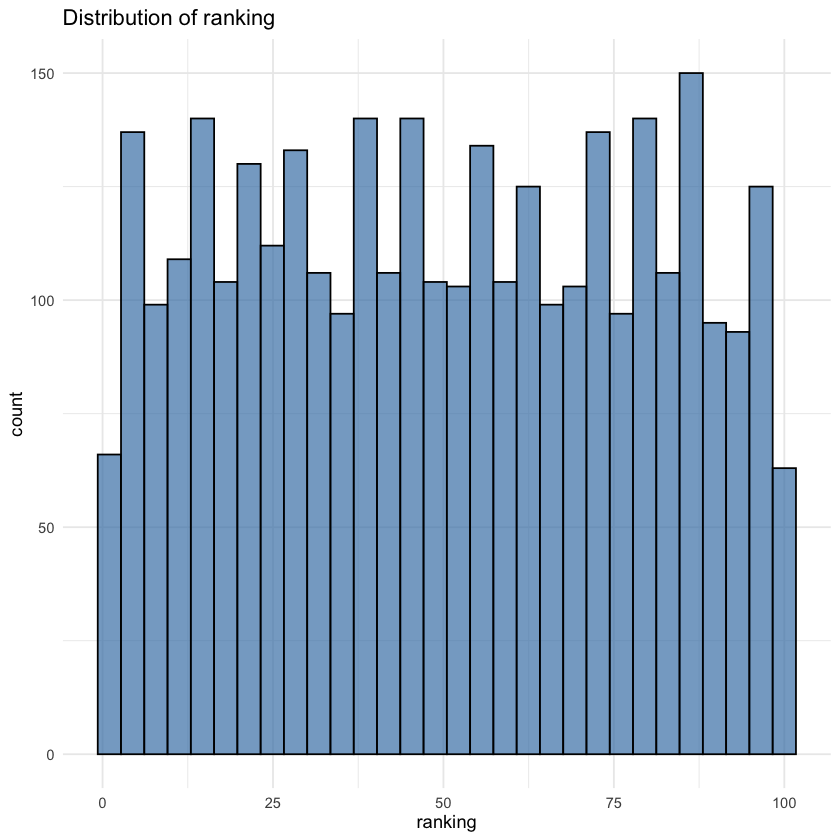

Warning message:
"Removed 2911 rows containing non-finite outside the scale range (`stat_bin()`)."


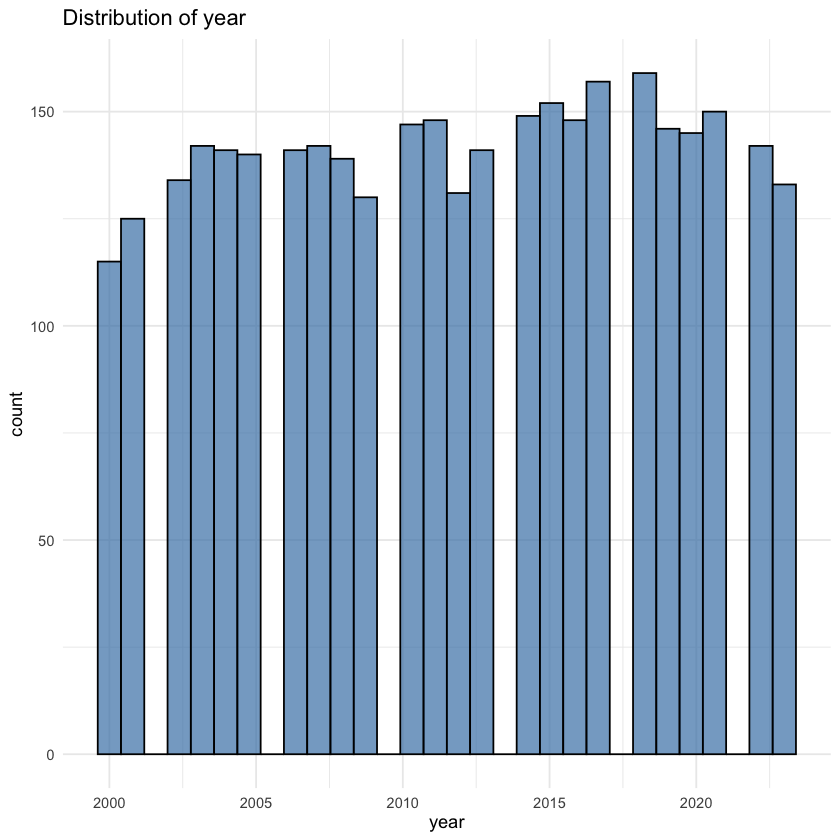

Warning message:
"Removed 2911 rows containing non-finite outside the scale range (`stat_bin()`)."


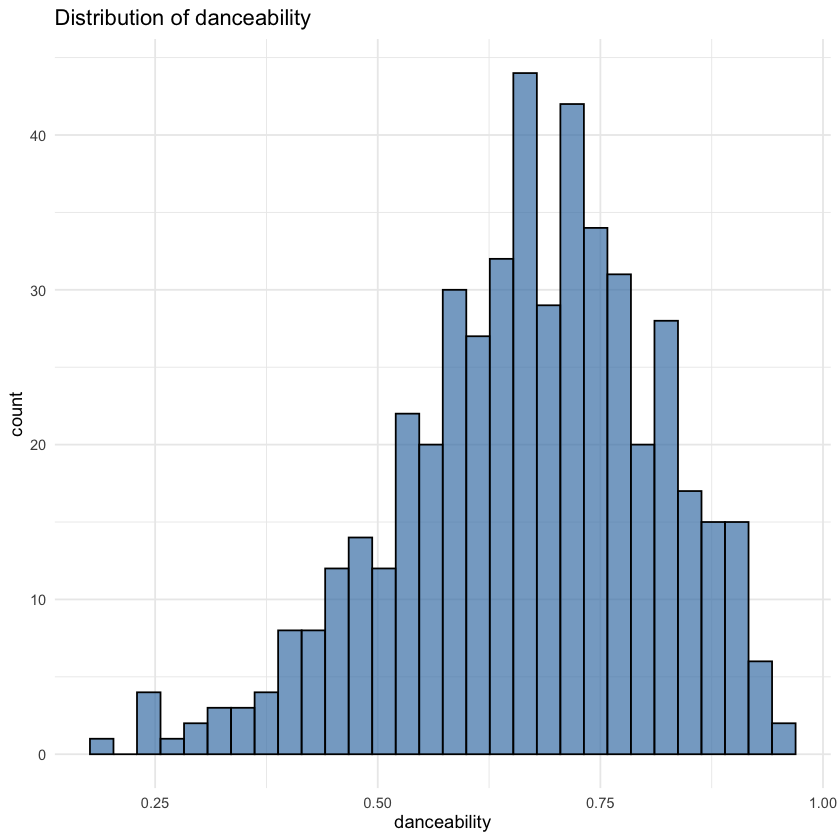

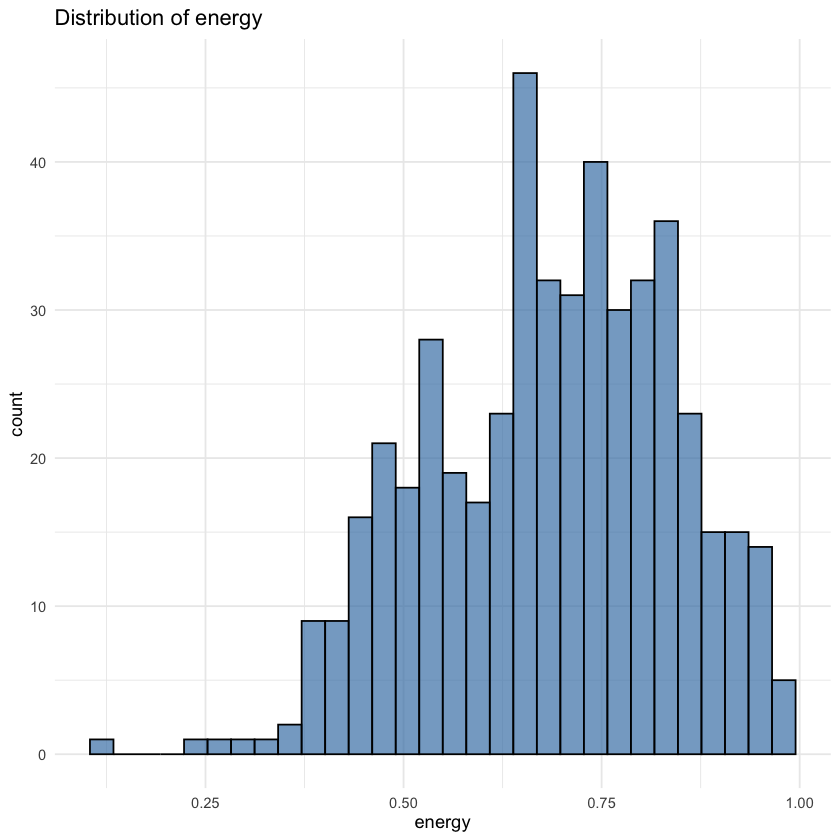

In [28]:
# Histograms for numerical columns
numerical_cols <- df %>% select_if(is.numeric) %>% names()

# Create individual histograms
for(col in numerical_cols[1:4]) {  # First 4 columns
  p <- ggplot(df, aes_string(x = col)) +
    geom_histogram(bins = 30, fill = "steelblue", color = "black", alpha = 0.7) +
    labs(title = paste("Distribution of", col)) +
    theme_minimal()
  print(p)
}

In [29]:
# Text analysis - Tokenize lyrics
words_df <- df %>%
  select(year, ranking, lyrics) %>%
  unnest_tokens(word, lyrics) %>%
  filter(!word %in% stop_words$word) %>%
  filter(nchar(word) > 2)

# Count word frequencies
word_counts <- words_df %>%
  count(word, sort = TRUE)

head(word_counts, 20)

,word,n
,<chr>,<int>
1,yeah,16674
2,love,9441
3,baby,8723
4,ooh,7153
5,wanna,6104
6,girl,5784
7,hey,4754
8,time,4021
9,feel,3177


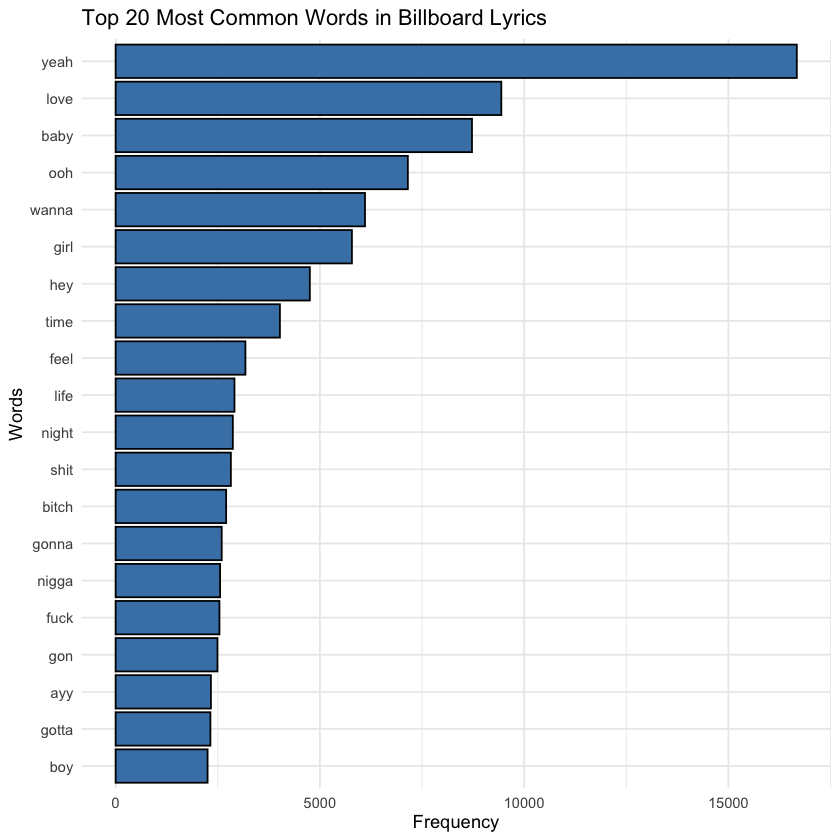

In [30]:
# Top 20 most common words visualization
top_20_words <- head(word_counts, 20)

ggplot(top_20_words, aes(x = reorder(word, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue", color = "black") +
  coord_flip() +
  labs(title = "Top 20 Most Common Words in Billboard Lyrics",
       x = "Words", y = "Frequency") +
  theme_minimal()

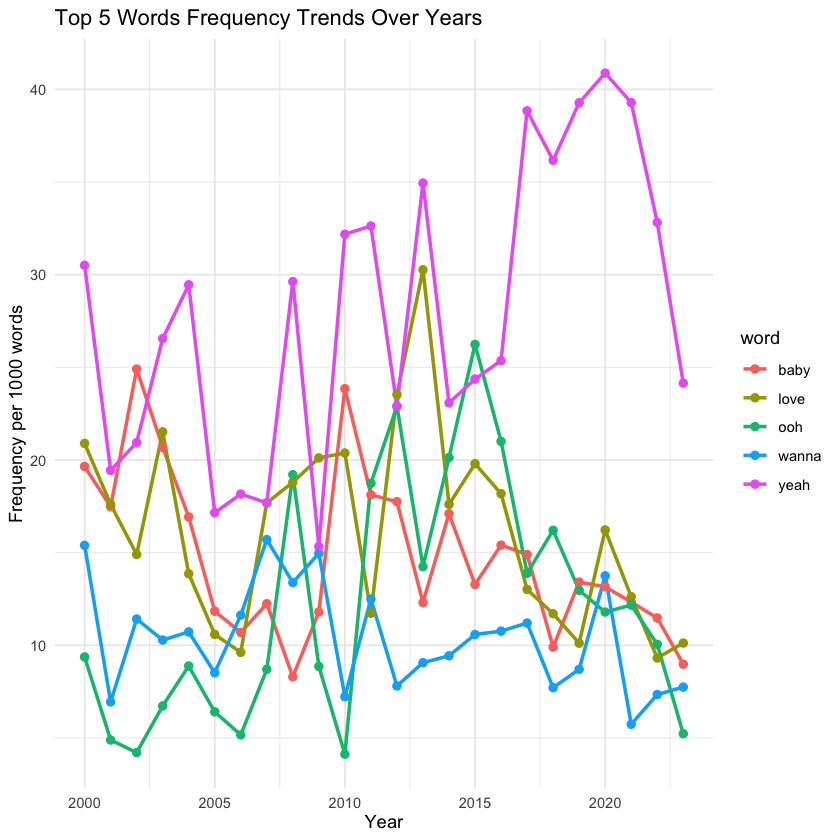

In [31]:
# Word frequency trends by year
yearly_word_freq <- words_df %>%
  count(year, word) %>%
  group_by(year) %>%
  mutate(total_words = sum(n),
         freq_per_1000 = (n / total_words) * 1000) %>%
  ungroup()

# Get top 5 words for cleaner visualization
top_5_words <- head(word_counts$word, 5)

yearly_top_words <- yearly_word_freq %>%
  filter(word %in% top_5_words)

ggplot(yearly_top_words, aes(x = year, y = freq_per_1000, color = word)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Top 5 Words Frequency Trends Over Years",
       x = "Year", y = "Frequency per 1000 words") +
  theme_minimal()

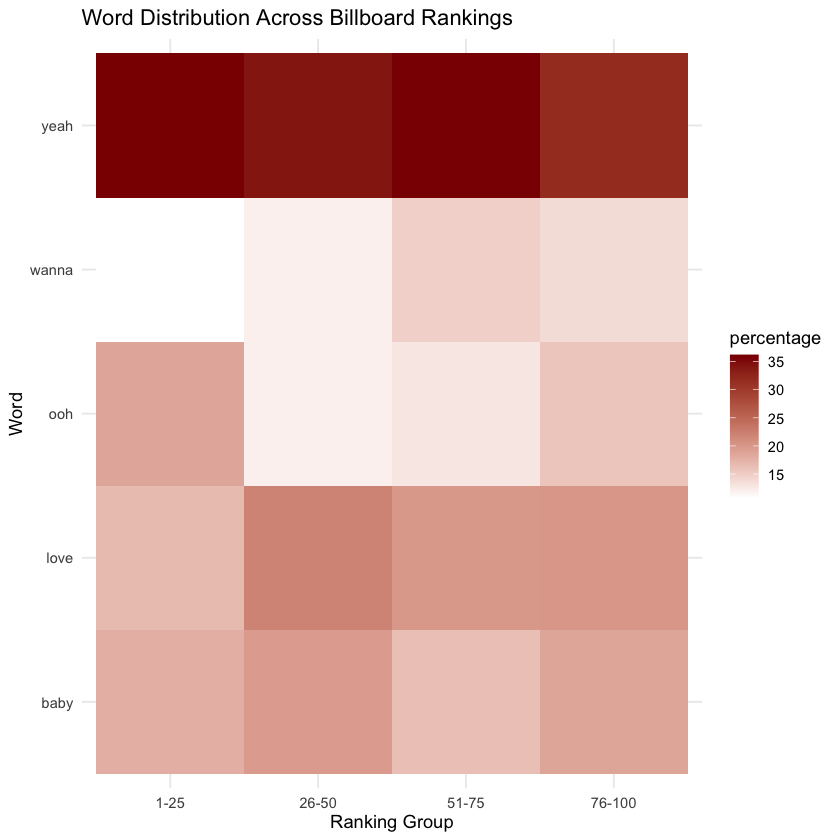

In [32]:
# Word distribution across rankings
ranking_analysis <- words_df %>%
  mutate(rank_group = case_when(
    ranking <= 25 ~ "1-25",
    ranking <= 50 ~ "26-50",
    ranking <= 75 ~ "51-75",
    TRUE ~ "76-100"
  )) %>%
  filter(word %in% top_5_words) %>%
  count(rank_group, word) %>%
  group_by(rank_group) %>%
  mutate(total = sum(n),
         percentage = (n / total) * 100)

ggplot(ranking_analysis, aes(x = rank_group, y = word, fill = percentage)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "darkred") +
  labs(title = "Word Distribution Across Billboard Rankings",
       x = "Ranking Group", y = "Word") +
  theme_minimal()

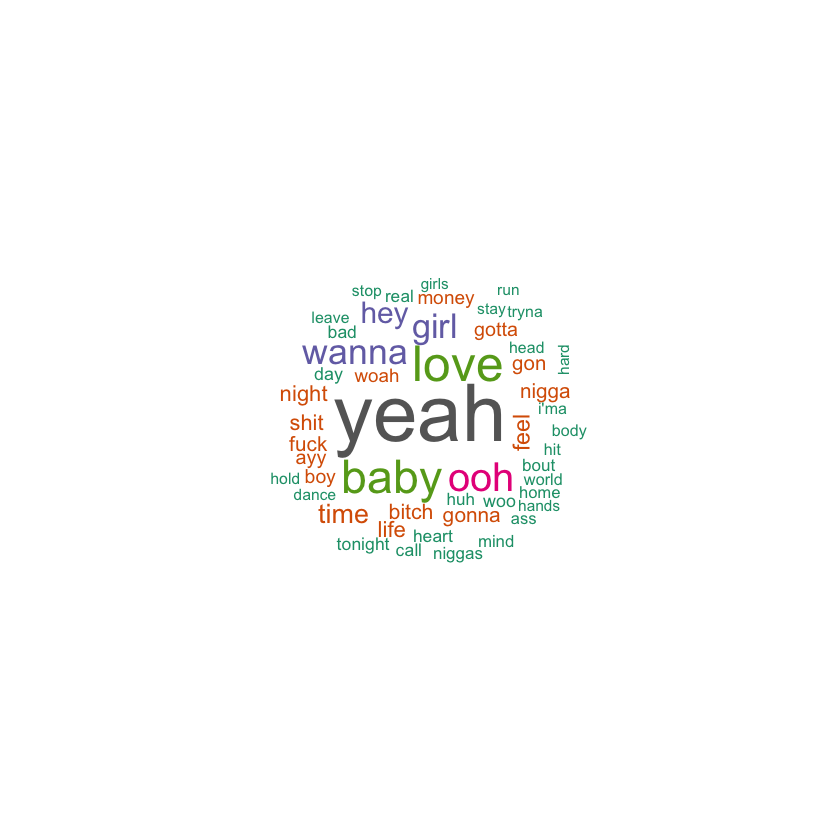

In [33]:
# Simple word cloud
set.seed(42)
wordcloud(words = word_counts$word[1:100], 
          freq = word_counts$n[1:100], 
          min.freq = 50, 
          max.words = 50,
          random.order = FALSE, 
          colors = brewer.pal(8, "Dark2"))

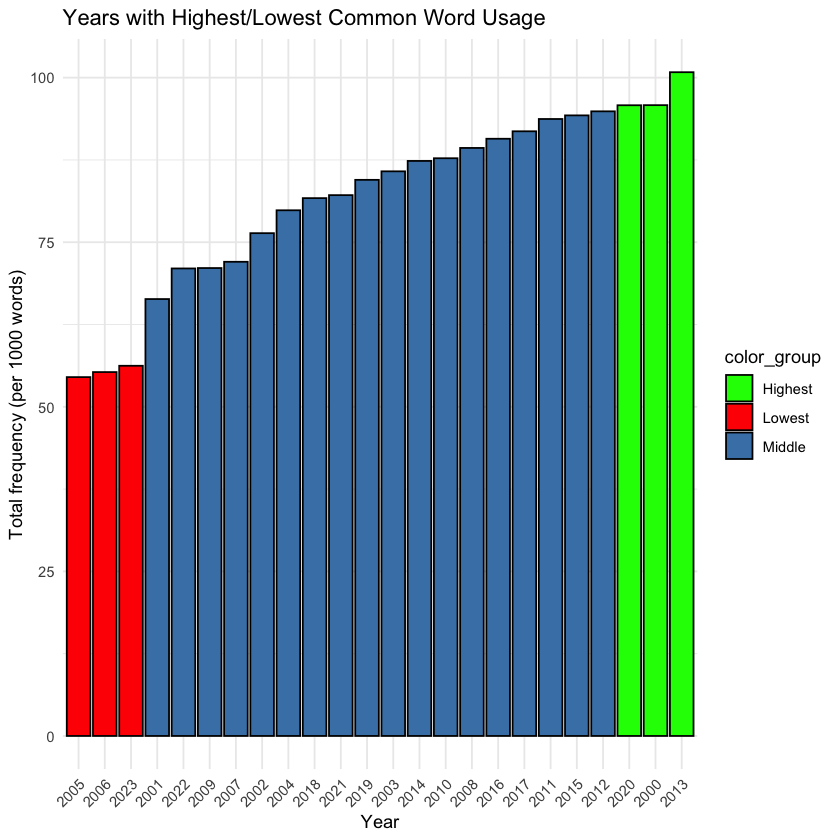

In [34]:
# Years with highest/lowest word usage
yearly_totals <- yearly_word_freq %>%
  filter(word %in% top_5_words) %>%
  group_by(year) %>%
  summarise(total_freq = sum(freq_per_1000)) %>%
  arrange(total_freq) %>%
  mutate(color_group = case_when(
    row_number() <= 3 ~ "Lowest",
    row_number() > n() - 3 ~ "Highest",
    TRUE ~ "Middle"
  ))

ggplot(yearly_totals, aes(x = reorder(year, total_freq), y = total_freq, fill = color_group)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = c("Lowest" = "red", "Middle" = "steelblue", "Highest" = "green")) +
  labs(title = "Years with Highest/Lowest Common Word Usage",
       x = "Year", y = "Total frequency (per 1000 words)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## 1. Audio Feature Correlations & Relationships
Understanding which musical characteristics tend to occur together

[1] "Correlation Matrix:"
                 danceability energy   key loudness  mode speechiness
danceability             1.00  -0.02  0.02     0.07 -0.17        0.25
energy                  -0.02   1.00 -0.04     0.61 -0.01        0.05
key                      0.02  -0.04  1.00    -0.04 -0.16       -0.05
loudness                 0.07   0.61 -0.04     1.00 -0.08        0.04
mode                    -0.17  -0.01 -0.16    -0.08  1.00       -0.08
speechiness              0.25   0.05 -0.05     0.04 -0.08        1.00
acousticness            -0.10  -0.36  0.11    -0.18 -0.10       -0.02
instrumentalness         0.02  -0.05  0.02    -0.27  0.04       -0.04
liveness                -0.22   0.16  0.02     0.06  0.09        0.02
valence                  0.51   0.29  0.03     0.14 -0.10        0.19
tempo                   -0.19   0.06  0.07    -0.02  0.07        0.01
                 acousticness instrumentalness liveness valence tempo
danceability            -0.10             0.02    -0.22    0.51 

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,loudness,energy,0.6104881
2,valence,danceability,0.5142566
3,acousticness,energy,-0.3554831
4,valence,energy,0.2914485
5,instrumentalness,loudness,-0.2673741
6,speechiness,danceability,0.2526660
7,liveness,danceability,-0.2202028
8,valence,speechiness,0.1917667
9,tempo,danceability,-0.1916415


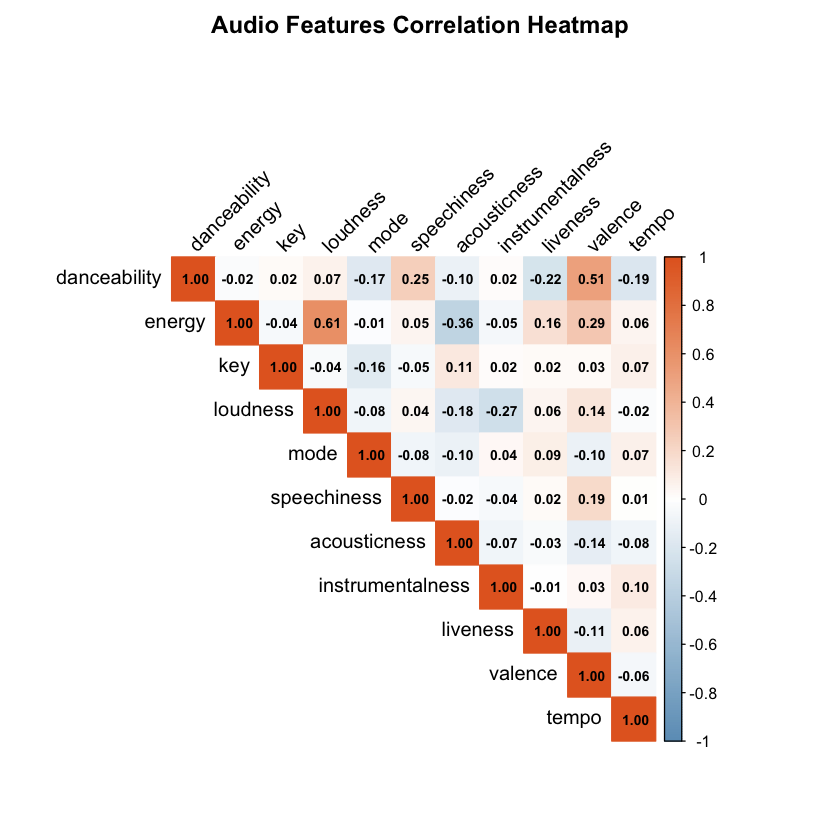

In [35]:
# Load corrplot library
library(corrplot)

# Select only Spotify audio features (numeric columns related to music characteristics)
audio_features <- df %>%
  select(danceability, energy, key, loudness, mode, speechiness, 
         acousticness, instrumentalness, liveness, valence, tempo) %>%
  na.omit()  # Remove rows with missing values

# Calculate correlation matrix
cor_matrix <- cor(audio_features)

# Display correlation matrix
print("Correlation Matrix:")
print(round(cor_matrix, 2))

# Create correlation heatmap with numbers
corrplot(cor_matrix, method = "color", type = "upper", 
         addCoef.col = "black", number.cex = 0.7,
         tl.col = "black", tl.srt = 45,
         col = colorRampPalette(c("#6D9EC1", "white", "#E46726"))(200),
         title = "Audio Features Correlation Heatmap",
         mar = c(0,0,2,0))

# Find strongest correlations (excluding diagonal)
cor_matrix[upper.tri(cor_matrix, diag = TRUE)] <- NA
cor_df <- as.data.frame(as.table(cor_matrix)) %>%
  na.omit() %>%
  arrange(desc(abs(Freq)))

cat("\n\nStrongest Correlations:\n")
head(cor_df, 10)

## 2. Audio Features vs Chart Performance
Discovering what makes a hit - do songs with certain characteristics rank higher?



Mean Audio Features by Ranking Group:
# A tibble: 5 x 6
  rank_group danceability energy valence acousticness tempo
  <chr>             <dbl>  <dbl>   <dbl>        <dbl> <dbl>
1 11-25             0.670  0.666   0.655        0.156  118.
2 26-50             0.656  0.693   0.580        0.149  117.
3 51-75             0.682  0.698   0.605        0.165  116.
4 76-100            0.659  0.670   0.564        0.193  120.
5 Top 10            0.670  0.692   0.606        0.156  109.


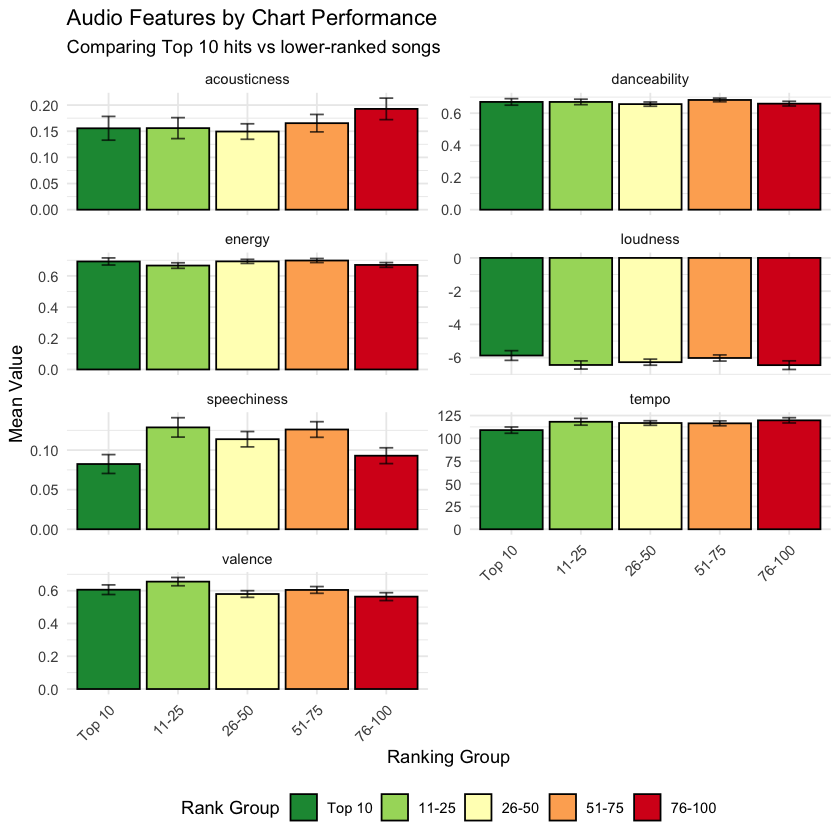

In [36]:
# Create ranking groups
df_complete <- df %>%
  filter(!is.na(danceability)) %>%  # Only include songs with Spotify data
  mutate(rank_group = case_when(
    ranking <= 10 ~ "Top 10",
    ranking <= 25 ~ "11-25",
    ranking <= 50 ~ "26-50",
    ranking <= 75 ~ "51-75",
    TRUE ~ "76-100"
  ))

# Calculate mean values for each audio feature by ranking group
feature_comparison <- df_complete %>%
  select(rank_group, danceability, energy, loudness, speechiness, 
         acousticness, valence, tempo) %>%
  pivot_longer(cols = -rank_group, names_to = "feature", values_to = "value") %>%
  group_by(rank_group, feature) %>%
  summarise(mean_value = mean(value, na.rm = TRUE),
            se = sd(value, na.rm = TRUE) / sqrt(n()),
            .groups = "drop")

# Reorder rank_group factor for proper ordering
feature_comparison$rank_group <- factor(feature_comparison$rank_group, 
                                       levels = c("Top 10", "11-25", "26-50", "51-75", "76-100"))

# Create faceted plot showing each feature by ranking group
ggplot(feature_comparison, aes(x = rank_group, y = mean_value, fill = rank_group)) +
  geom_bar(stat = "identity", color = "black") +
  geom_errorbar(aes(ymin = mean_value - se, ymax = mean_value + se), 
                width = 0.2, alpha = 0.7) +
  facet_wrap(~ feature, scales = "free_y", ncol = 2) +
  scale_fill_brewer(palette = "RdYlGn", direction = -1) +
  labs(title = "Audio Features by Chart Performance",
       subtitle = "Comparing Top 10 hits vs lower-ranked songs",
       x = "Ranking Group", y = "Mean Value",
       fill = "Rank Group") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom")

# Statistical summary table
cat("\n\nMean Audio Features by Ranking Group:\n")
summary_table <- df_complete %>%
  select(rank_group, danceability, energy, valence, acousticness, tempo) %>%
  group_by(rank_group) %>%
  summarise(across(everything(), ~mean(.x, na.rm = TRUE)), .groups = "drop")

print(summary_table)

In [37]:
# Statistical tests: Compare Top 10 vs Bottom 50 (51-100)
top_10 <- df_complete %>% filter(rank_group == "Top 10")
bottom_50 <- df_complete %>% filter(rank_group %in% c("51-75", "76-100"))

# T-tests for each feature
features_to_test <- c("danceability", "energy", "valence", "acousticness", "loudness", "tempo")

cat("Statistical Tests: Top 10 vs Bottom 50 (Ranks 51-100)\n")
cat("=" %>% rep(60) %>% paste(collapse = ""), "\n\n")

test_results <- data.frame()

for(feature in features_to_test) {
  t_test <- t.test(top_10[[feature]], bottom_50[[feature]])
  
  top_10_mean <- mean(top_10[[feature]], na.rm = TRUE)
  bottom_50_mean <- mean(bottom_50[[feature]], na.rm = TRUE)
  difference <- top_10_mean - bottom_50_mean
  
  cat(sprintf("%-20s: Top 10 = %.3f, Bottom 50 = %.3f, Diff = %.3f, p-value = %.4f %s\n",
              feature, top_10_mean, bottom_50_mean, difference, t_test$p.value,
              ifelse(t_test$p.value < 0.05, "***", "")))
  
  test_results <- rbind(test_results, data.frame(
    feature = feature,
    top10_mean = top_10_mean,
    bottom50_mean = bottom_50_mean,
    difference = difference,
    p_value = t_test$p.value,
    significant = t_test$p.value < 0.05
  ))
}

cat("\n*** = statistically significant at p < 0.05\n\n")

# Visualize the significant differences
sig_features <- test_results %>% filter(significant == TRUE)

if(nrow(sig_features) > 0) {
  cat("\nFeatures with statistically significant differences:\n")
  print(sig_features %>% select(feature, difference, p_value))
}

Statistical Tests: Top 10 vs Bottom 50 (Ranks 51-100)

danceability        : Top 10 = 0.670, Bottom 50 = 0.672, Diff = -0.002, p-value = 0.9125 
energy              : Top 10 = 0.692, Bottom 50 = 0.686, Diff = 0.006, p-value = 0.8135 
valence             : Top 10 = 0.606, Bottom 50 = 0.587, Diff = 0.019, p-value = 0.5762 
acousticness        : Top 10 = 0.156, Bottom 50 = 0.177, Diff = -0.021, p-value = 0.4162 
loudness            : Top 10 = -5.870, Bottom 50 = -6.201, Diff = 0.331, p-value = 0.3176 
tempo               : Top 10 = 108.962, Bottom 50 = 117.818, Diff = -8.855, p-value = 0.0287 ***

*** = statistically significant at p < 0.05


Features with statistically significant differences:
  feature difference    p_value
1   tempo   -8.85517 0.02865148


## 3. Bigrams & Phrases Analysis
Multi-word phrases reveal more context than individual words

Top 20 Most Common Bigrams:
      bigram    n
1  yeah yeah 4338
2    ooh ooh 2786
3    hey hey 1242
4  woah woah  657
5    ayy ayy  568
6    doh doh  516
7  baby baby  500
8    doo doo  465
9  baby girl  330
10   low low  324
11 bang bang  264
12   ooh wee  264
13   woo woo  255
14   nah nah  249
15 boaw boaw  242
16 whoa whoa  236
17 love love  231
18   bye bye  224
19  ooh yeah  219
20  ooh baby  217


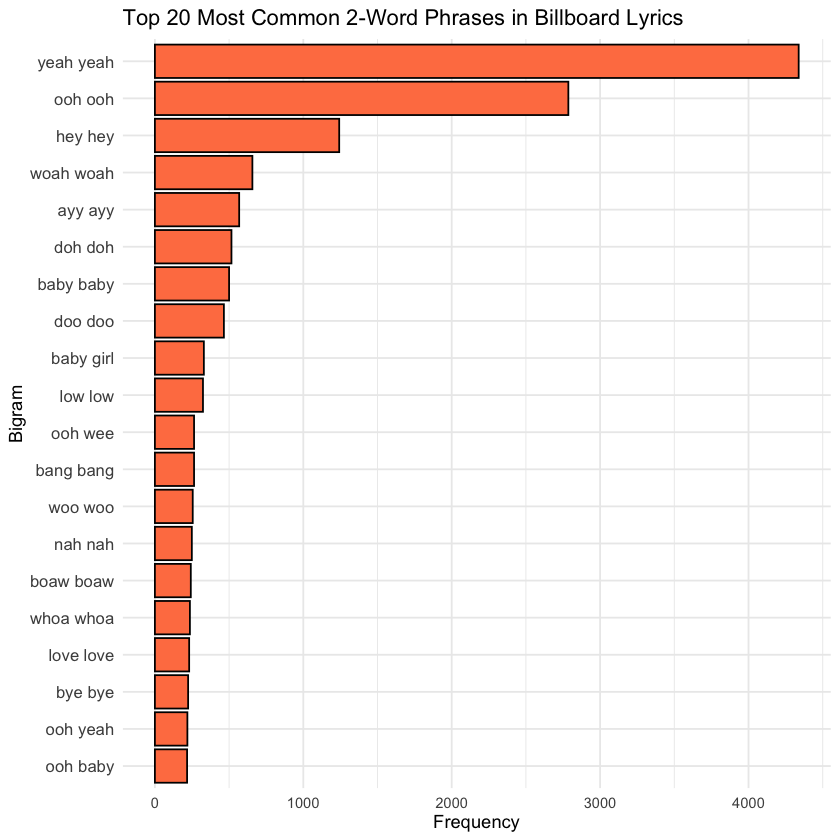

In [38]:
# Extract bigrams (2-word phrases) from lyrics
bigrams_df <- df %>%
  select(year, ranking, lyrics) %>%
  unnest_tokens(bigram, lyrics, token = "ngrams", n = 2) %>%
  filter(!is.na(bigram))

# Separate bigrams into two words and filter out stop words
bigrams_separated <- bigrams_df %>%
  separate(bigram, c("word1", "word2"), sep = " ") %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word) %>%
  filter(nchar(word1) > 2 & nchar(word2) > 2)

# Combine back to bigrams
bigrams_united <- bigrams_separated %>%
  unite(bigram, word1, word2, sep = " ")

# Count bigram frequencies
bigram_counts <- bigrams_united %>%
  count(bigram, sort = TRUE)

# Display top 20 bigrams
cat("Top 20 Most Common Bigrams:\n")
print(head(bigram_counts, 20))

# Visualize top 20 bigrams
top_20_bigrams <- head(bigram_counts, 20)

ggplot(top_20_bigrams, aes(x = reorder(bigram, n), y = n)) +
  geom_bar(stat = "identity", fill = "coral", color = "black") +
  coord_flip() +
  labs(title = "Top 20 Most Common 2-Word Phrases in Billboard Lyrics",
       x = "Bigram", y = "Frequency") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 10))


Top 15 Most Common Trigrams (3-word phrases):
           trigram    n
1         oh oh oh 5768
2   you might also 3330
3  might also like 3266
4         la la la 2264
5   yeah yeah yeah 2199
6         na na na 1964
7      ooh ooh ooh 1744
8    i don't wanna  818
9         ha ha ha  777
10      i know you  775
11     the way you  711
12    i don't know  672
13        no no no  633
14      you know i  620
15      i want you  577


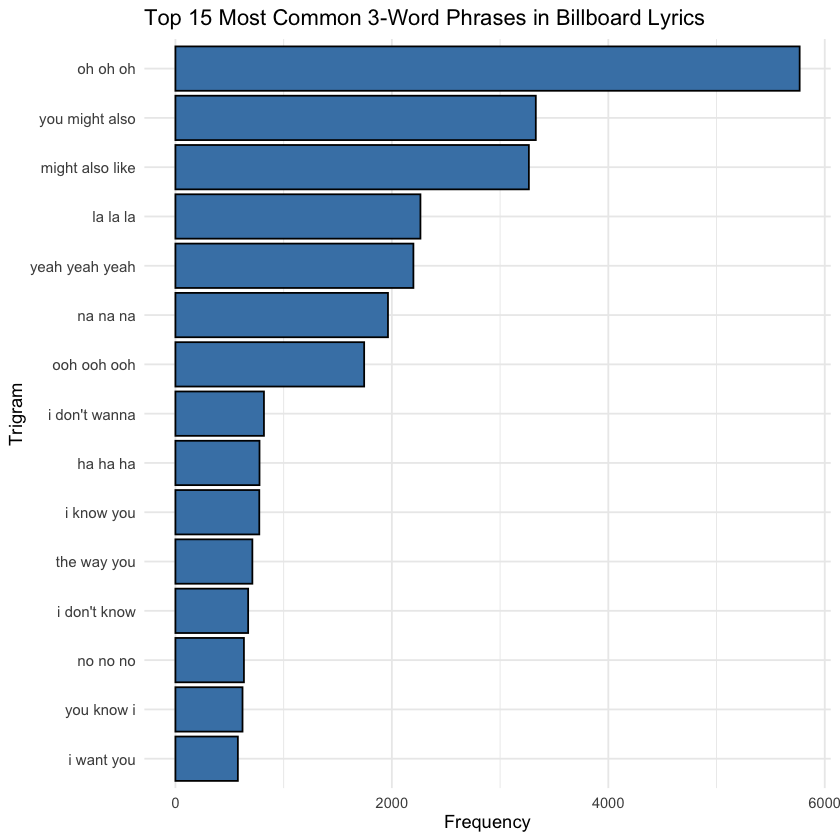

In [39]:
# Extract trigrams (3-word phrases)
trigrams_df <- df %>%
  select(year, ranking, lyrics) %>%
  unnest_tokens(trigram, lyrics, token = "ngrams", n = 3) %>%
  filter(!is.na(trigram))

# Count trigram frequencies
trigram_counts <- trigrams_df %>%
  count(trigram, sort = TRUE) %>%
  filter(n > 50)  # Filter for more meaningful phrases

cat("\nTop 15 Most Common Trigrams (3-word phrases):\n")
print(head(trigram_counts, 15))

# Visualize top 15 trigrams
top_15_trigrams <- head(trigram_counts, 15)

ggplot(top_15_trigrams, aes(x = reorder(trigram, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue", color = "black") +
  coord_flip() +
  labs(title = "Top 15 Most Common 3-Word Phrases in Billboard Lyrics",
       x = "Trigram", y = "Frequency") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 9))


Top Bigrams by Decade:


=== 2000s ===
# A tibble: 10 x 2
   bigram        n
   <chr>     <int>
 1 yeah yeah  1448
 2 ooh ooh     518
 3 hey hey     362
 4 ooh wee     261
 5 baby baby   254
 6 whoa whoa   233
 7 baby girl   222
 8 wee ooh     216
 9 ayy ayy     189
10 igh igh     186

=== 2010s ===
# A tibble: 10 x 2
   bigram        n
   <chr>     <int>
 1 yeah yeah  2111
 2 ooh ooh    1996
 3 hey hey     816
 4 doh doh     516
 5 woah woah   365
 6 ayy ayy     303
 7 doo doo     263
 8 baby baby   231
 9 low low     209
10 dae dae     177

=== 2020s ===
# A tibble: 10 x 2
   bigram          n
   <chr>       <int>
 1 yeah yeah     779
 2 ooh ooh       272
 3 boaw boaw     242
 4 woah woah     192
 5 party party   165
 6 ody ody       159
 7 bam bam       154
 8 gang shit     116
 9 nah nah        87
10 doo doo        86


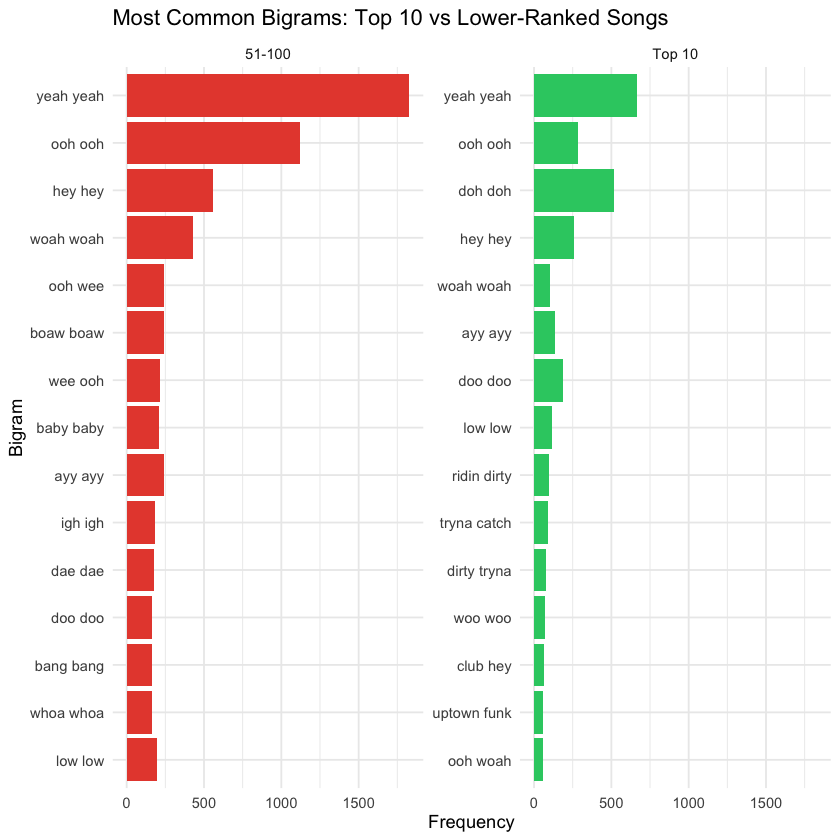

In [40]:
# Analyze bigram trends by decade
bigrams_by_decade <- bigrams_united %>%
  mutate(decade = case_when(
    year >= 2000 & year < 2010 ~ "2000s",
    year >= 2010 & year < 2020 ~ "2010s",
    year >= 2020 ~ "2020s"
  )) %>%
  count(decade, bigram) %>%
  group_by(decade) %>%
  slice_max(n, n = 10) %>%
  ungroup()

cat("\nTop Bigrams by Decade:\n\n")
for(dec in c("2000s", "2010s", "2020s")) {
  cat(sprintf("\n=== %s ===\n", dec))
  decade_data <- bigrams_by_decade %>% 
    filter(decade == dec) %>%
    arrange(desc(n))
  print(decade_data %>% select(bigram, n))
}

# Compare phrases associated with #1 hits vs lower ranks
top_10_bigrams <- bigrams_united %>%
  filter(ranking <= 10) %>%
  count(bigram, sort = TRUE) %>%
  slice_max(n, n = 15) %>%
  mutate(group = "Top 10")

bottom_bigrams <- bigrams_united %>%
  filter(ranking > 50) %>%
  count(bigram, sort = TRUE) %>%
  slice_max(n, n = 15) %>%
  mutate(group = "51-100")

combined_bigrams <- rbind(top_10_bigrams, bottom_bigrams)

ggplot(combined_bigrams, aes(x = reorder(bigram, n), y = n, fill = group)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  facet_wrap(~ group, scales = "free_y") +
  scale_fill_manual(values = c("Top 10" = "#2ecc71", "51-100" = "#e74c3c")) +
  labs(title = "Most Common Bigrams: Top 10 vs Lower-Ranked Songs",
       x = "Bigram", y = "Frequency") +
  theme_minimal() +
  theme(legend.position = "none")

## 4. Energy-Valence Quadrant Analysis
Categorizing songs by their emotional characteristics


Song Distribution by Emotional Quadrant:
              quadrant   n percentage
1      Calm & Negative 145   29.83539
2 Energetic & Positive 144   29.62963
3      Calm & Positive  99   20.37037
4 Energetic & Negative  98   20.16461


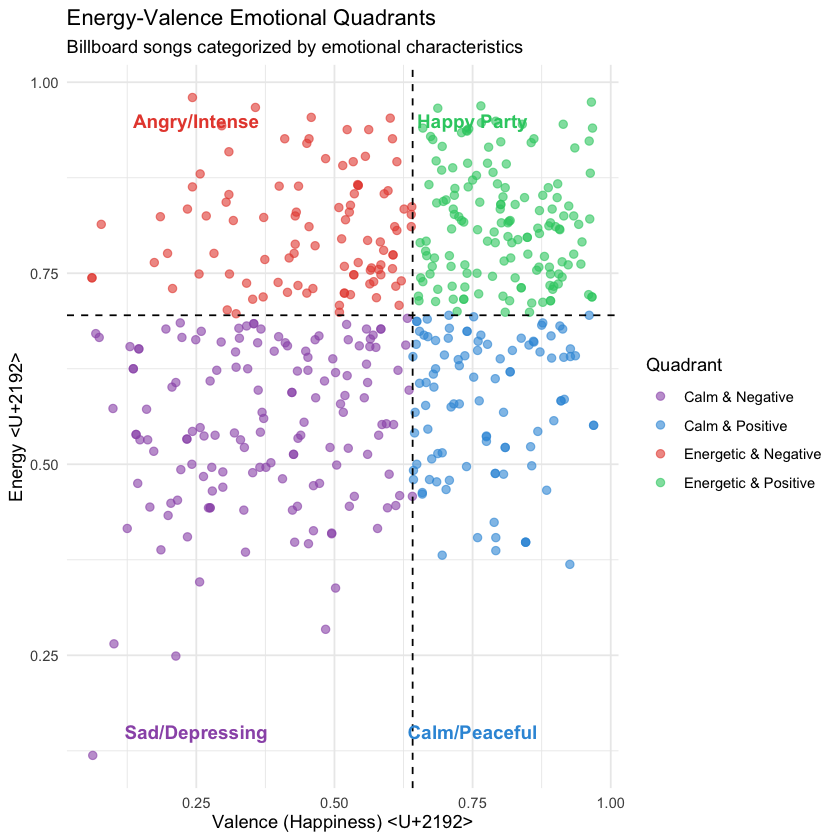

In [41]:
# Create energy-valence quadrants
df_quadrants <- df %>%
  filter(!is.na(energy) & !is.na(valence)) %>%
  mutate(
    energy_cat = ifelse(energy > median(energy), "High Energy", "Low Energy"),
    valence_cat = ifelse(valence > median(valence), "High Valence", "Low Valence"),
    quadrant = case_when(
      energy > median(energy) & valence > median(valence) ~ "Energetic & Positive",
      energy > median(energy) & valence <= median(valence) ~ "Energetic & Negative",
      energy <= median(energy) & valence > median(valence) ~ "Calm & Positive",
      energy <= median(energy) & valence <= median(valence) ~ "Calm & Negative"
    )
  )

# Create scatter plot with quadrants
ggplot(df_quadrants, aes(x = valence, y = energy, color = quadrant)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_vline(xintercept = median(df_quadrants$valence), linetype = "dashed", color = "black") +
  geom_hline(yintercept = median(df_quadrants$energy), linetype = "dashed", color = "black") +
  scale_color_manual(values = c(
    "Energetic & Positive" = "#2ecc71",   # Green
    "Calm & Positive" = "#3498db",        # Blue
    "Energetic & Negative" = "#e74c3c",   # Red
    "Calm & Negative" = "#9b59b6"         # Purple
  )) +
  labs(title = "Energy-Valence Emotional Quadrants",
       subtitle = "Billboard songs categorized by emotional characteristics",
       x = "Valence (Happiness) →",
       y = "Energy →",
       color = "Quadrant") +
  theme_minimal() +
  theme(legend.position = "right") +
  annotate("text", x = 0.25, y = 0.95, label = "Angry/Intense", size = 4, fontface = "bold", color = "#e74c3c") +
  annotate("text", x = 0.75, y = 0.95, label = "Happy Party", size = 4, fontface = "bold", color = "#2ecc71") +
  annotate("text", x = 0.25, y = 0.15, label = "Sad/Depressing", size = 4, fontface = "bold", color = "#9b59b6") +
  annotate("text", x = 0.75, y = 0.15, label = "Calm/Peaceful", size = 4, fontface = "bold", color = "#3498db")

# Count songs in each quadrant
quadrant_counts <- df_quadrants %>%
  count(quadrant) %>%
  mutate(percentage = (n / sum(n)) * 100) %>%
  arrange(desc(n))

cat("\nSong Distribution by Emotional Quadrant:\n")
print(quadrant_counts)

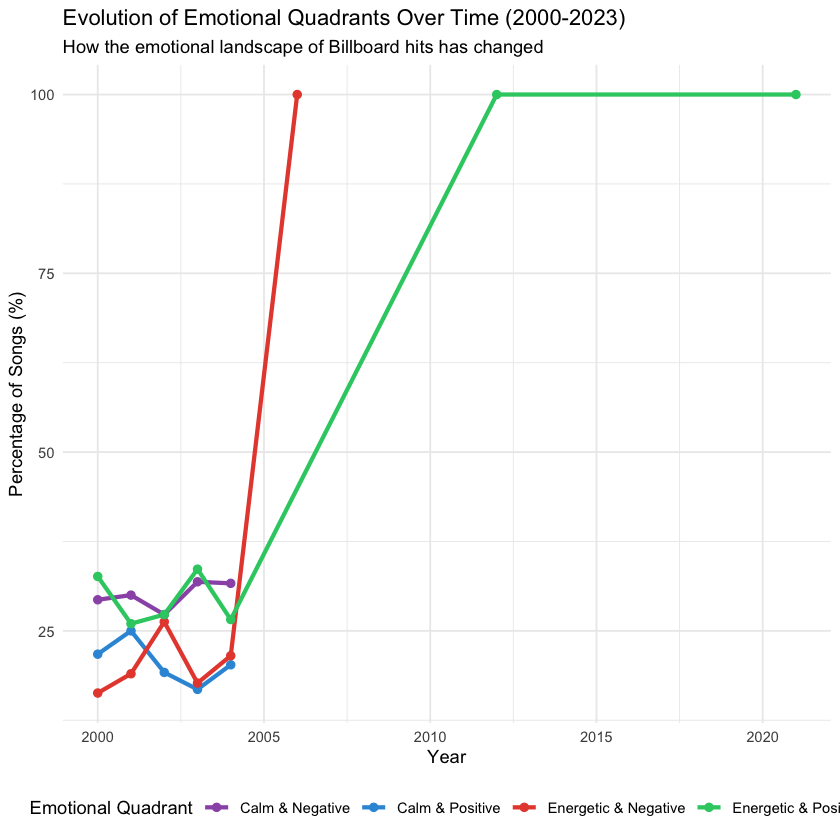


Quadrant distribution by decade:
# A tibble: 6 x 4
  decade quadrant                 n percentage
  <chr>  <chr>                <int>      <dbl>
1 2000s  Calm & Negative        145       30.0
2 2000s  Calm & Positive         99       20.5
3 2000s  Energetic & Negative    98       20.2
4 2000s  Energetic & Positive   142       29.3
5 2010s  Energetic & Positive     1      100  
6 2020s  Energetic & Positive     1      100  


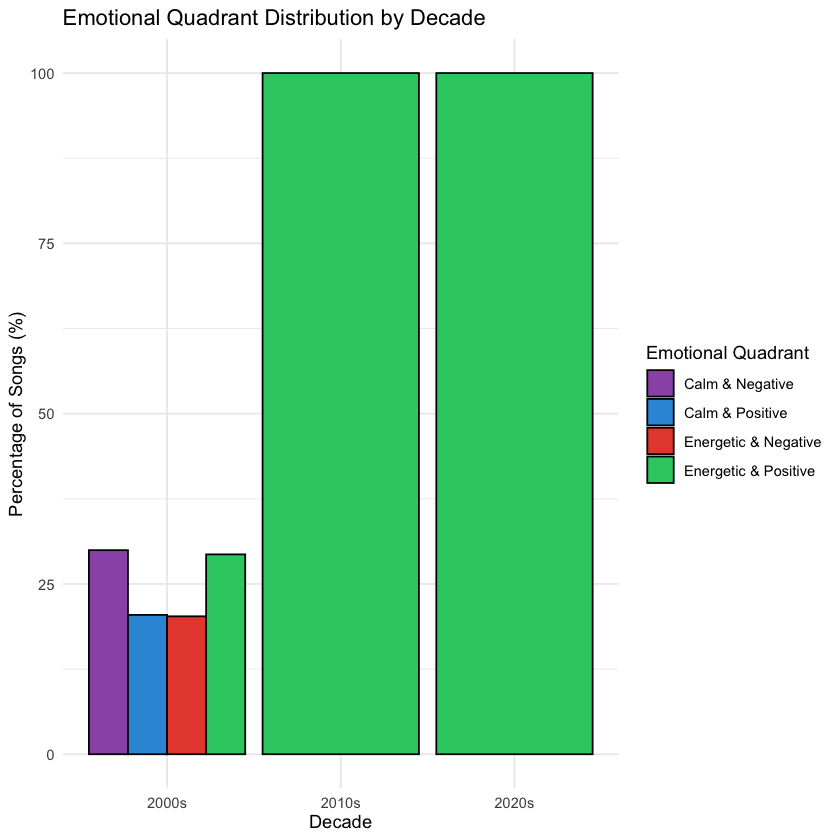

In [42]:
# Analyze quadrant trends over time
quadrant_by_year <- df_quadrants %>%
  count(year, quadrant) %>%
  group_by(year) %>%
  mutate(percentage = (n / sum(n)) * 100) %>%
  ungroup()

ggplot(quadrant_by_year, aes(x = year, y = percentage, color = quadrant, group = quadrant)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  scale_color_manual(values = c(
    "Energetic & Positive" = "#2ecc71",
    "Calm & Positive" = "#3498db",
    "Energetic & Negative" = "#e74c3c",
    "Calm & Negative" = "#9b59b6"
  )) +
  labs(title = "Evolution of Emotional Quadrants Over Time (2000-2023)",
       subtitle = "How the emotional landscape of Billboard hits has changed",
       x = "Year",
       y = "Percentage of Songs (%)",
       color = "Emotional Quadrant") +
  theme_minimal() +
  theme(legend.position = "bottom")

# Identify decades with most change
decades_summary <- df_quadrants %>%
  mutate(decade = case_when(
    year >= 2000 & year < 2010 ~ "2000s",
    year >= 2010 & year < 2020 ~ "2010s",
    year >= 2020 ~ "2020s"
  )) %>%
  count(decade, quadrant) %>%
  group_by(decade) %>%
  mutate(percentage = (n / sum(n)) * 100) %>%
  ungroup()

ggplot(decades_summary, aes(x = decade, y = percentage, fill = quadrant)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  scale_fill_manual(values = c(
    "Energetic & Positive" = "#2ecc71",
    "Calm & Positive" = "#3498db",
    "Energetic & Negative" = "#e74c3c",
    "Calm & Negative" = "#9b59b6"
  )) +
  labs(title = "Emotional Quadrant Distribution by Decade",
       x = "Decade",
       y = "Percentage of Songs (%)",
       fill = "Emotional Quadrant") +
  theme_minimal() +
  theme(legend.position = "right")

cat("\nQuadrant distribution by decade:\n")
print(decades_summary %>% select(decade, quadrant, n, percentage))

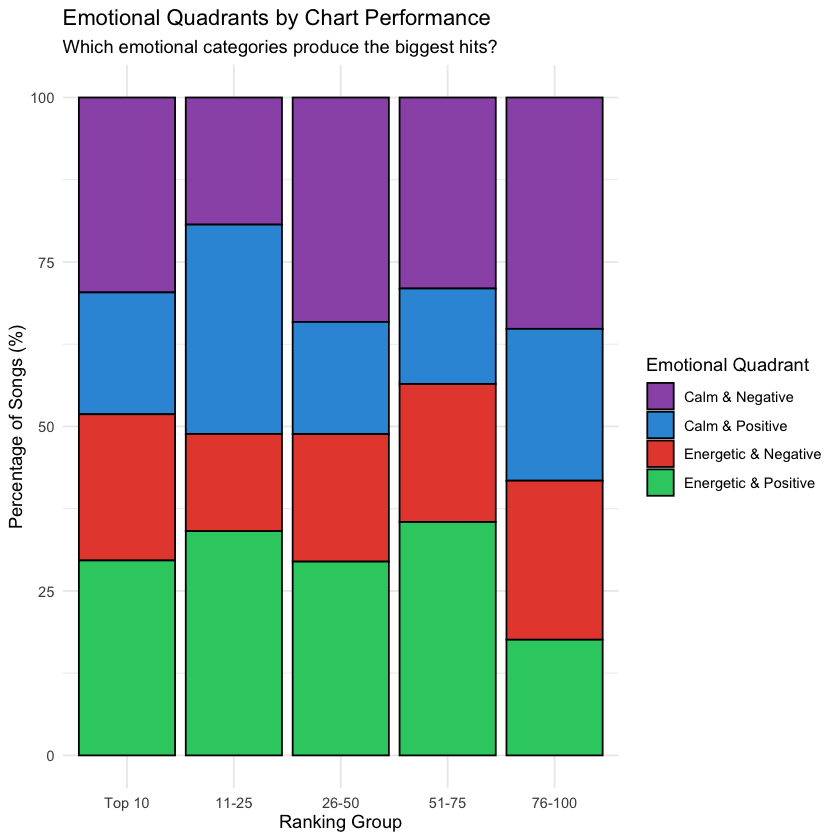



Quadrant Performance Analysis:

Top 10 hits quadrant distribution:
# A tibble: 4 x 3
  quadrant                 n percentage
  <chr>                <int>      <dbl>
1 Calm & Negative         16       29.6
2 Energetic & Positive    16       29.6
3 Energetic & Negative    12       22.2
4 Calm & Positive         10       18.5


Average ranking by quadrant:
# A tibble: 4 x 4
  quadrant             avg_rank median_rank count
  <chr>                   <dbl>       <dbl> <int>
1 Energetic & Positive     42.6        41.5   144
2 Calm & Positive          43.8        34      99
3 Calm & Negative          49.3        47     145
4 Energetic & Negative     49.4        50      98


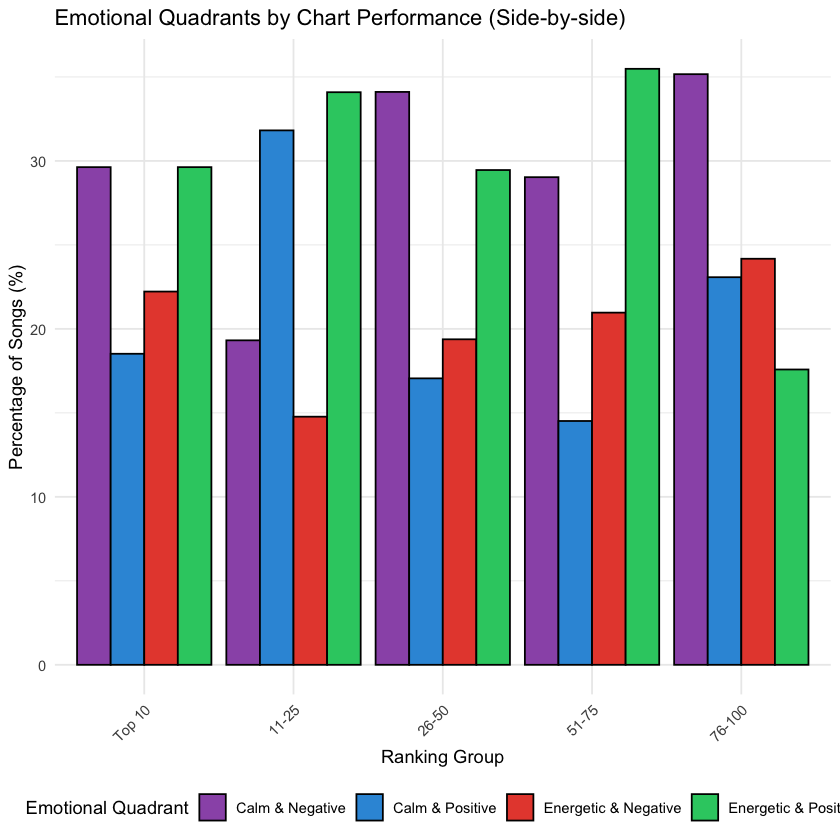

In [43]:
# Which quadrant produces most hits? Compare by ranking
quadrant_by_rank <- df_quadrants %>%
  mutate(rank_group = case_when(
    ranking <= 10 ~ "Top 10",
    ranking <= 25 ~ "11-25",
    ranking <= 50 ~ "26-50",
    ranking <= 75 ~ "51-75",
    TRUE ~ "76-100"
  )) %>%
  count(rank_group, quadrant) %>%
  group_by(rank_group) %>%
  mutate(percentage = (n / sum(n)) * 100) %>%
  ungroup()

# Reorder factor for proper display
quadrant_by_rank$rank_group <- factor(quadrant_by_rank$rank_group,
                                     levels = c("Top 10", "11-25", "26-50", "51-75", "76-100"))

# Stacked bar chart
ggplot(quadrant_by_rank, aes(x = rank_group, y = percentage, fill = quadrant)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = c(
    "Energetic & Positive" = "#2ecc71",
    "Calm & Positive" = "#3498db",
    "Energetic & Negative" = "#e74c3c",
    "Calm & Negative" = "#9b59b6"
  )) +
  labs(title = "Emotional Quadrants by Chart Performance",
       subtitle = "Which emotional categories produce the biggest hits?",
       x = "Ranking Group",
       y = "Percentage of Songs (%)",
       fill = "Emotional Quadrant") +
  theme_minimal() +
  theme(legend.position = "right")

# Side-by-side comparison
ggplot(quadrant_by_rank, aes(x = rank_group, y = percentage, fill = quadrant)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  scale_fill_manual(values = c(
    "Energetic & Positive" = "#2ecc71",
    "Calm & Positive" = "#3498db",
    "Energetic & Negative" = "#e74c3c",
    "Calm & Negative" = "#9b59b6"
  )) +
  labs(title = "Emotional Quadrants by Chart Performance (Side-by-side)",
       x = "Ranking Group",
       y = "Percentage of Songs (%)",
       fill = "Emotional Quadrant") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "bottom")

# Statistical summary
cat("\n\nQuadrant Performance Analysis:\n")
cat("=" %>% rep(60) %>% paste(collapse = ""), "\n\n")

top_10_quadrants <- quadrant_by_rank %>%
  filter(rank_group == "Top 10") %>%
  arrange(desc(percentage))

cat("Top 10 hits quadrant distribution:\n")
print(top_10_quadrants %>% select(quadrant, n, percentage))

cat("\n\nAverage ranking by quadrant:\n")
avg_ranking <- df_quadrants %>%
  group_by(quadrant) %>%
  summarise(
    avg_rank = mean(ranking),
    median_rank = median(ranking),
    count = n()
  ) %>%
  arrange(avg_rank)

print(avg_ranking)

---
## 5. Lexical Diversity & Repetition Analysis
Testing if "simpler + catchier = more successful"

In [44]:
# Calculate lexical diversity and repetition metrics for each song
library(stringr)

# Function to calculate metrics for a single lyrics text
calculate_lyrics_metrics <- function(lyrics_text) {
  # Clean and extract words
  words <- lyrics_text %>%
    str_to_lower() %>%
    str_replace_all("[^a-z\\s]", "") %>%
    str_split("\\s+") %>%
    unlist()
  
  # Remove empty strings
  words <- words[words != ""]
  
  # Calculate metrics
  total_words <- length(words)
  unique_words <- length(unique(words))
  
  if (total_words > 0) {
    lexical_diversity <- unique_words / total_words
    repetition_rate <- 1 - lexical_diversity
    avg_word_length <- mean(nchar(words))
    compression_ratio <- (total_words - unique_words) / total_words
  } else {
    lexical_diversity <- NA
    repetition_rate <- NA
    avg_word_length <- NA
    compression_ratio <- NA
  }
  
  return(data.frame(
    total_words = total_words,
    unique_words = unique_words,
    lexical_diversity = lexical_diversity,
    repetition_rate = repetition_rate,
    avg_word_length = avg_word_length,
    compression_ratio = compression_ratio
  ))
}

# Apply function to all songs using a more reliable approach
df_with_lyrics <- df %>%
  filter(!is.na(lyrics) & lyrics != "") %>%
  select(song, band_singer, year, ranking, lyrics)

# Calculate metrics for all lyrics
metrics_list <- lapply(df_with_lyrics$lyrics, calculate_lyrics_metrics)
metrics_df <- do.call(rbind, metrics_list)

# Combine with original data (excluding lyrics column)
lyrics_metrics <- cbind(
  df_with_lyrics %>% select(-lyrics),
  metrics_df
)

# Display summary statistics
cat("Lexical Diversity & Repetition Metrics Summary:\n")
cat("=" %>% rep(60) %>% paste(collapse = ""), "\n\n")

summary_stats <- lyrics_metrics %>%
  summarise(
    avg_total_words = mean(total_words, na.rm = TRUE),
    avg_unique_words = mean(unique_words, na.rm = TRUE),
    avg_lexical_diversity = mean(lexical_diversity, na.rm = TRUE),
    avg_repetition_rate = mean(repetition_rate, na.rm = TRUE),
    avg_word_length = mean(avg_word_length, na.rm = TRUE),
    avg_compression = mean(compression_ratio, na.rm = TRUE)
  )

print(summary_stats)

cat("\n\nDistribution of Lexical Diversity:\n")
summary(lyrics_metrics$lexical_diversity)

Lexical Diversity & Repetition Metrics Summary:

  avg_total_words avg_unique_words avg_lexical_diversity avg_repetition_rate
1        508.6947         160.1752             0.3234429           0.6765571
  avg_word_length avg_compression
1        3.772456       0.6765571


Distribution of Lexical Diversity:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.07059 0.26547 0.31551 0.32344 0.36683 0.92593 

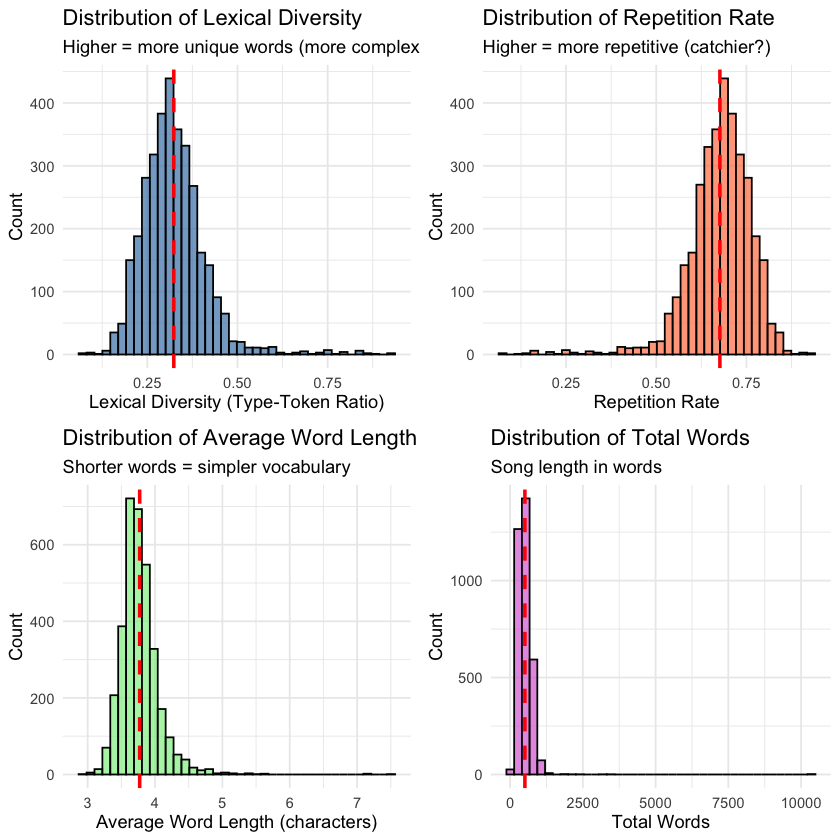

In [45]:
# Visualize distributions of complexity metrics
p1 <- ggplot(lyrics_metrics, aes(x = lexical_diversity)) +
  geom_histogram(bins = 40, fill = "steelblue", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = mean(lexical_diversity, na.rm = TRUE)), 
             color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribution of Lexical Diversity",
       subtitle = "Higher = more unique words (more complex)",
       x = "Lexical Diversity (Type-Token Ratio)",
       y = "Count") +
  theme_minimal()

p2 <- ggplot(lyrics_metrics, aes(x = repetition_rate)) +
  geom_histogram(bins = 40, fill = "coral", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = mean(repetition_rate, na.rm = TRUE)), 
             color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribution of Repetition Rate",
       subtitle = "Higher = more repetitive (catchier?)",
       x = "Repetition Rate",
       y = "Count") +
  theme_minimal()

p3 <- ggplot(lyrics_metrics, aes(x = avg_word_length)) +
  geom_histogram(bins = 40, fill = "lightgreen", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = mean(avg_word_length, na.rm = TRUE)), 
             color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribution of Average Word Length",
       subtitle = "Shorter words = simpler vocabulary",
       x = "Average Word Length (characters)",
       y = "Count") +
  theme_minimal()

p4 <- ggplot(lyrics_metrics, aes(x = total_words)) +
  geom_histogram(bins = 40, fill = "orchid", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = mean(total_words, na.rm = TRUE)), 
             color = "red", linetype = "dashed", size = 1) +
  labs(title = "Distribution of Total Words",
       subtitle = "Song length in words",
       x = "Total Words",
       y = "Count") +
  theme_minimal()

# Display all plots
grid.arrange(p1, p2, p3, p4, ncol = 2)

Average Metrics by Chart Position:

# A tibble: 5 x 6
  rank_group avg_lexical_diversity avg_repetition_rate avg_word_length
  <fct>                      <dbl>               <dbl>           <dbl>
1 11-25                      0.318               0.682            3.79
2 26-50                      0.318               0.682            3.75
3 51-75                      0.324               0.676            3.78
4 76-100                     0.335               0.665            3.77
5 Top 10                     0.317               0.683            3.78
# i 2 more variables: avg_total_words <dbl>, count <int>


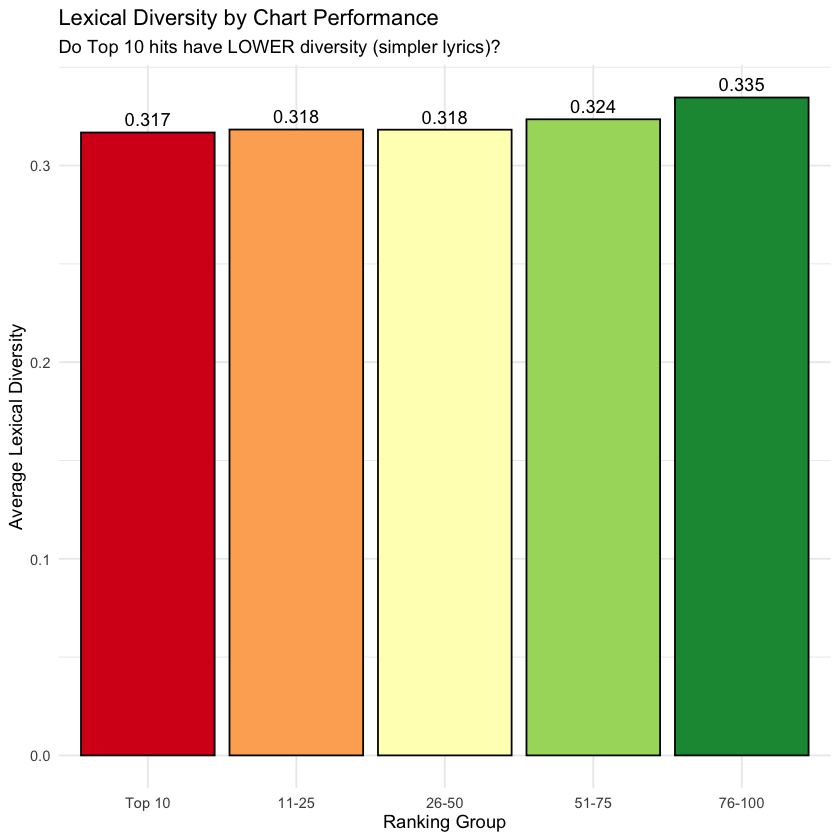

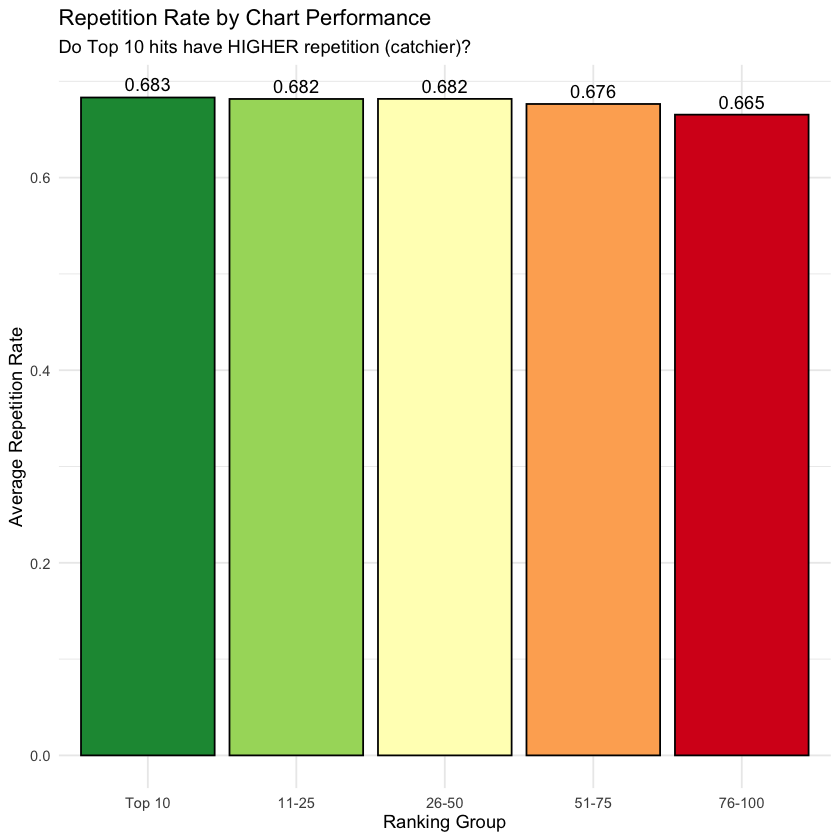

In [46]:
# THE KEY QUESTION: Does simplicity and repetition correlate with chart success?

# Create ranking groups
lyrics_by_rank <- lyrics_metrics %>%
  mutate(rank_group = case_when(
    ranking <= 10 ~ "Top 10",
    ranking <= 25 ~ "11-25",
    ranking <= 50 ~ "26-50",
    ranking <= 75 ~ "51-75",
    TRUE ~ "76-100"
  ))

# Calculate averages by ranking group
rank_comparison <- lyrics_by_rank %>%
  group_by(rank_group) %>%
  summarise(
    avg_lexical_diversity = mean(lexical_diversity, na.rm = TRUE),
    avg_repetition_rate = mean(repetition_rate, na.rm = TRUE),
    avg_word_length = mean(avg_word_length, na.rm = TRUE),
    avg_total_words = mean(total_words, na.rm = TRUE),
    count = n()
  ) %>%
  ungroup()

# Reorder factor
rank_comparison$rank_group <- factor(rank_comparison$rank_group,
                                    levels = c("Top 10", "11-25", "26-50", "51-75", "76-100"))

cat("Average Metrics by Chart Position:\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n\n")
print(rank_comparison)

# Visualize lexical diversity by ranking
ggplot(rank_comparison, aes(x = rank_group, y = avg_lexical_diversity, fill = rank_group)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_brewer(palette = "RdYlGn", direction = 1) +
  geom_text(aes(label = round(avg_lexical_diversity, 3)), vjust = -0.5) +
  labs(title = "Lexical Diversity by Chart Performance",
       subtitle = "Do Top 10 hits have LOWER diversity (simpler lyrics)?",
       x = "Ranking Group",
       y = "Average Lexical Diversity",
       fill = "Rank Group") +
  theme_minimal() +
  theme(legend.position = "none")

# Visualize repetition rate by ranking
ggplot(rank_comparison, aes(x = rank_group, y = avg_repetition_rate, fill = rank_group)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_brewer(palette = "RdYlGn", direction = -1) +
  geom_text(aes(label = round(avg_repetition_rate, 3)), vjust = -0.5) +
  labs(title = "Repetition Rate by Chart Performance",
       subtitle = "Do Top 10 hits have HIGHER repetition (catchier)?",
       x = "Ranking Group",
       y = "Average Repetition Rate",
       fill = "Rank Group") +
  theme_minimal() +
  theme(legend.position = "none")

In [47]:
# Statistical tests: Top 10 vs Bottom 50
top_10_lyrics <- lyrics_by_rank %>% filter(rank_group == "Top 10")
bottom_50_lyrics <- lyrics_by_rank %>% filter(rank_group %in% c("51-75", "76-100"))

cat("\n\nSTATISTICAL TESTS: Top 10 vs Bottom 50 (Ranks 51-100)\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n\n")

# Test lexical diversity
lex_test <- t.test(top_10_lyrics$lexical_diversity, bottom_50_lyrics$lexical_diversity)
cat(sprintf("Lexical Diversity:\n"))
cat(sprintf("  Top 10 mean: %.4f\n", mean(top_10_lyrics$lexical_diversity, na.rm = TRUE)))
cat(sprintf("  Bottom 50 mean: %.4f\n", mean(bottom_50_lyrics$lexical_diversity, na.rm = TRUE)))
cat(sprintf("  Difference: %.4f\n", mean(top_10_lyrics$lexical_diversity, na.rm = TRUE) - 
                                     mean(bottom_50_lyrics$lexical_diversity, na.rm = TRUE)))
cat(sprintf("  p-value: %.4f %s\n\n", lex_test$p.value, 
            ifelse(lex_test$p.value < 0.05, "*** SIGNIFICANT", "")))

# Test repetition rate
rep_test <- t.test(top_10_lyrics$repetition_rate, bottom_50_lyrics$repetition_rate)
cat(sprintf("Repetition Rate:\n"))
cat(sprintf("  Top 10 mean: %.4f\n", mean(top_10_lyrics$repetition_rate, na.rm = TRUE)))
cat(sprintf("  Bottom 50 mean: %.4f\n", mean(bottom_50_lyrics$repetition_rate, na.rm = TRUE)))
cat(sprintf("  Difference: %.4f\n", mean(top_10_lyrics$repetition_rate, na.rm = TRUE) - 
                                     mean(bottom_50_lyrics$repetition_rate, na.rm = TRUE)))
cat(sprintf("  p-value: %.4f %s\n\n", rep_test$p.value, 
            ifelse(rep_test$p.value < 0.05, "*** SIGNIFICANT", "")))

# Test average word length
word_test <- t.test(top_10_lyrics$avg_word_length, bottom_50_lyrics$avg_word_length)
cat(sprintf("Average Word Length:\n"))
cat(sprintf("  Top 10 mean: %.4f\n", mean(top_10_lyrics$avg_word_length, na.rm = TRUE)))
cat(sprintf("  Bottom 50 mean: %.4f\n", mean(bottom_50_lyrics$avg_word_length, na.rm = TRUE)))
cat(sprintf("  Difference: %.4f\n", mean(top_10_lyrics$avg_word_length, na.rm = TRUE) - 
                                     mean(bottom_50_lyrics$avg_word_length, na.rm = TRUE)))
cat(sprintf("  p-value: %.4f %s\n\n", word_test$p.value, 
            ifelse(word_test$p.value < 0.05, "*** SIGNIFICANT", "")))

# Test total words
total_test <- t.test(top_10_lyrics$total_words, bottom_50_lyrics$total_words)
cat(sprintf("Total Words:\n"))
cat(sprintf("  Top 10 mean: %.0f\n", mean(top_10_lyrics$total_words, na.rm = TRUE)))
cat(sprintf("  Bottom 50 mean: %.0f\n", mean(bottom_50_lyrics$total_words, na.rm = TRUE)))
cat(sprintf("  Difference: %.0f\n", mean(top_10_lyrics$total_words, na.rm = TRUE) - 
                                     mean(bottom_50_lyrics$total_words, na.rm = TRUE)))
cat(sprintf("  p-value: %.4f %s\n\n", total_test$p.value, 
            ifelse(total_test$p.value < 0.05, "*** SIGNIFICANT", "")))

cat("\n*** = statistically significant at p < 0.05\n")



STATISTICAL TESTS: Top 10 vs Bottom 50 (Ranks 51-100)

Lexical Diversity:
  Top 10 mean: 0.3168
  Bottom 50 mean: 0.3291
  Difference: -0.0123
  p-value: 0.0217 *** SIGNIFICANT

Repetition Rate:
  Top 10 mean: 0.6832
  Bottom 50 mean: 0.6709
  Difference: 0.0123
  p-value: 0.0217 *** SIGNIFICANT

Average Word Length:
  Top 10 mean: 3.7795
  Bottom 50 mean: 3.7742
  Difference: 0.0052
  p-value: 0.7611 

Total Words:
  Top 10 mean: 522
  Bottom 50 mean: 501
  Difference: 21
  p-value: 0.5187 


*** = statistically significant at p < 0.05


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'




Trend Analysis (Correlation with Year):

Lexical Diversity vs Year: r = 0.483, p = 0.0168 *** SIGNIFICANT TREND
Repetition Rate vs Year: r = -0.483, p = 0.0168 *** SIGNIFICANT TREND
Word Length vs Year: r = 0.395, p = 0.0563 
Total Words vs Year: r = -0.826, p = 0.0000 *** SIGNIFICANT TREND


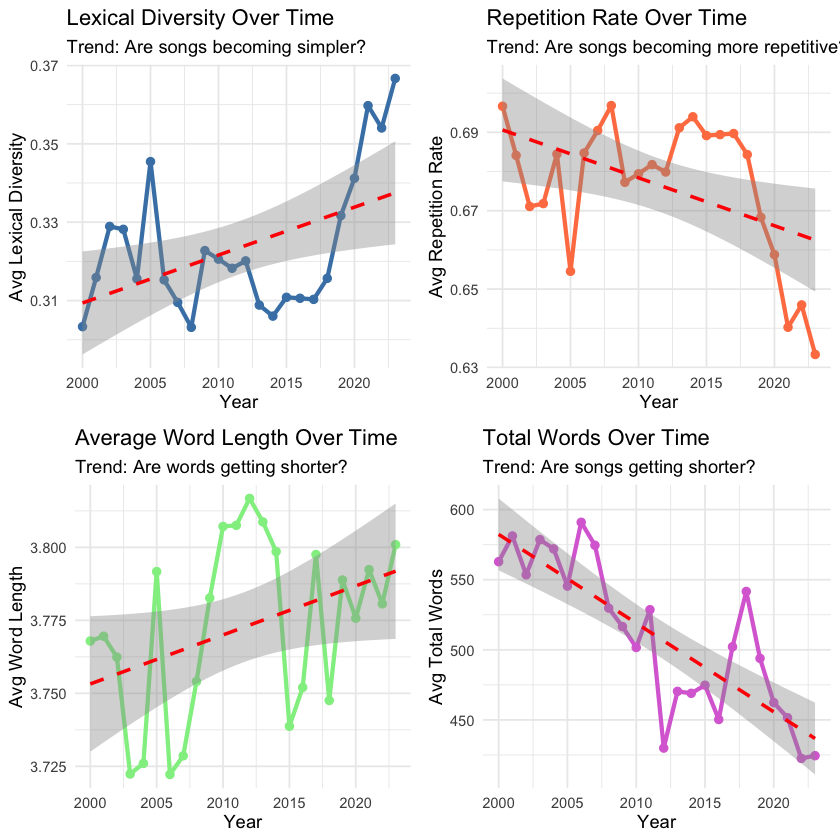

In [48]:
# Analyze trends over time: Are lyrics getting simpler and more repetitive?

yearly_complexity <- lyrics_metrics %>%
  group_by(year) %>%
  summarise(
    avg_lexical_diversity = mean(lexical_diversity, na.rm = TRUE),
    avg_repetition_rate = mean(repetition_rate, na.rm = TRUE),
    avg_word_length = mean(avg_word_length, na.rm = TRUE),
    avg_total_words = mean(total_words, na.rm = TRUE),
    count = n()
  )

# Create multi-panel plot showing trends
p1 <- ggplot(yearly_complexity, aes(x = year, y = avg_lexical_diversity)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(size = 2, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "red", linetype = "dashed") +
  labs(title = "Lexical Diversity Over Time",
       subtitle = "Trend: Are songs becoming simpler?",
       x = "Year", y = "Avg Lexical Diversity") +
  theme_minimal()

p2 <- ggplot(yearly_complexity, aes(x = year, y = avg_repetition_rate)) +
  geom_line(color = "coral", size = 1.2) +
  geom_point(size = 2, color = "coral") +
  geom_smooth(method = "lm", se = TRUE, color = "red", linetype = "dashed") +
  labs(title = "Repetition Rate Over Time",
       subtitle = "Trend: Are songs becoming more repetitive?",
       x = "Year", y = "Avg Repetition Rate") +
  theme_minimal()

p3 <- ggplot(yearly_complexity, aes(x = year, y = avg_word_length)) +
  geom_line(color = "lightgreen", size = 1.2) +
  geom_point(size = 2, color = "lightgreen") +
  geom_smooth(method = "lm", se = TRUE, color = "red", linetype = "dashed") +
  labs(title = "Average Word Length Over Time",
       subtitle = "Trend: Are words getting shorter?",
       x = "Year", y = "Avg Word Length") +
  theme_minimal()

p4 <- ggplot(yearly_complexity, aes(x = year, y = avg_total_words)) +
  geom_line(color = "orchid", size = 1.2) +
  geom_point(size = 2, color = "orchid") +
  geom_smooth(method = "lm", se = TRUE, color = "red", linetype = "dashed") +
  labs(title = "Total Words Over Time",
       subtitle = "Trend: Are songs getting shorter?",
       x = "Year", y = "Avg Total Words") +
  theme_minimal()

grid.arrange(p1, p2, p3, p4, ncol = 2)

# Calculate correlation with year to quantify trends
cat("\n\nTrend Analysis (Correlation with Year):\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n\n")

cor_lex <- cor.test(yearly_complexity$year, yearly_complexity$avg_lexical_diversity)
cor_rep <- cor.test(yearly_complexity$year, yearly_complexity$avg_repetition_rate)
cor_word <- cor.test(yearly_complexity$year, yearly_complexity$avg_word_length)
cor_total <- cor.test(yearly_complexity$year, yearly_complexity$avg_total_words)

cat(sprintf("Lexical Diversity vs Year: r = %.3f, p = %.4f %s\n", 
            cor_lex$estimate, cor_lex$p.value,
            ifelse(cor_lex$p.value < 0.05, "*** SIGNIFICANT TREND", "")))
cat(sprintf("Repetition Rate vs Year: r = %.3f, p = %.4f %s\n", 
            cor_rep$estimate, cor_rep$p.value,
            ifelse(cor_rep$p.value < 0.05, "*** SIGNIFICANT TREND", "")))
cat(sprintf("Word Length vs Year: r = %.3f, p = %.4f %s\n", 
            cor_word$estimate, cor_word$p.value,
            ifelse(cor_word$p.value < 0.05, "*** SIGNIFICANT TREND", "")))
cat(sprintf("Total Words vs Year: r = %.3f, p = %.4f %s\n", 
            cor_total$estimate, cor_total$p.value,
            ifelse(cor_total$p.value < 0.05, "*** SIGNIFICANT TREND", "")))

In [49]:
# Find the most and least diverse/repetitive songs as examples

cat("\n\nMOST REPETITIVE SONGS (Highest Repetition Rate):\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n")
most_repetitive <- lyrics_metrics %>%
  arrange(desc(repetition_rate)) %>%
  select(song, band_singer, year, ranking, repetition_rate, lexical_diversity, total_words) %>%
  head(10)
print(most_repetitive)

cat("\n\nLEAST REPETITIVE SONGS (Highest Lexical Diversity):\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n")
least_repetitive <- lyrics_metrics %>%
  arrange(desc(lexical_diversity)) %>%
  select(song, band_singer, year, ranking, lexical_diversity, repetition_rate, total_words) %>%
  head(10)
print(least_repetitive)

cat("\n\nSIMPLEST SONGS (Shortest Average Word Length):\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n")
simplest_words <- lyrics_metrics %>%
  arrange(avg_word_length) %>%
  select(song, band_singer, year, ranking, avg_word_length, total_words) %>%
  head(10)
print(simplest_words)

cat("\n\nMOST COMPLEX SONGS (Longest Average Word Length):\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n")
complex_words <- lyrics_metrics %>%
  arrange(desc(avg_word_length)) %>%
  select(song, band_singer, year, ranking, avg_word_length, total_words) %>%
  head(10)
print(complex_words)



MOST REPETITIVE SONGS (Highest Repetition Rate):
                    song       band_singer year ranking repetition_rate
1               Watch Me    Silent\303\263 2015       8       0.9294118
2               Watch Me    Silent\303\263 2016      88       0.9294118
3              Get Lucky         Daft Punk 2013      14       0.9030544
4              Get Lucky Pharrell Williams 2013      14       0.9030544
5                   Gold            Kiiara 2016      52       0.8983607
6  ILY (I Love You Baby)         Surf Mesa 2020      95       0.8903509
7       Blue (Da Ba Dee)         Eiffel 65 2000      49       0.8735441
8      Turn Up the Music       Chris Brown 2012      84       0.8695652
9           Harlem Shake            Baauer 2013       4       0.8600000
10            Thong Song      Sisq\303\263 2000      14       0.8568156
   lexical_diversity total_words
1         0.07058824         425
2         0.07058824         425
3         0.09694555         753
4         0.09694555     



CATCHINESS SCORE ANALYSIS

Correlation between Catchiness Score and Ranking:
  r = -0.070
  p-value = 0.0000 *** SIGNIFICANT

NEGATIVE correlation = Higher catchiness score <U+2192> LOWER ranking number <U+2192> BETTER chart position!


TOP 15 CATCHIEST SONGS (High Repetition + Low Diversity):
                    song       band_singer year ranking catchiness_score
1               Watch Me    Silent\303\263 2015       8        1.0000000
2               Watch Me    Silent\303\263 2016      88        1.0000000
3              Get Lucky         Daft Punk 2013      14        0.9691849
4              Get Lucky Pharrell Williams 2013      14        0.9691849
5                   Gold            Kiiara 2016      52        0.9636973
6  ILY (I Love You Baby)         Surf Mesa 2020      95        0.9543328
7       Blue (Da Ba Dee)         Eiffel 65 2000      49        0.9346835
8      Turn Up the Music       Chris Brown 2012      84        0.9300317
9           Harlem Shake            Baauer 201

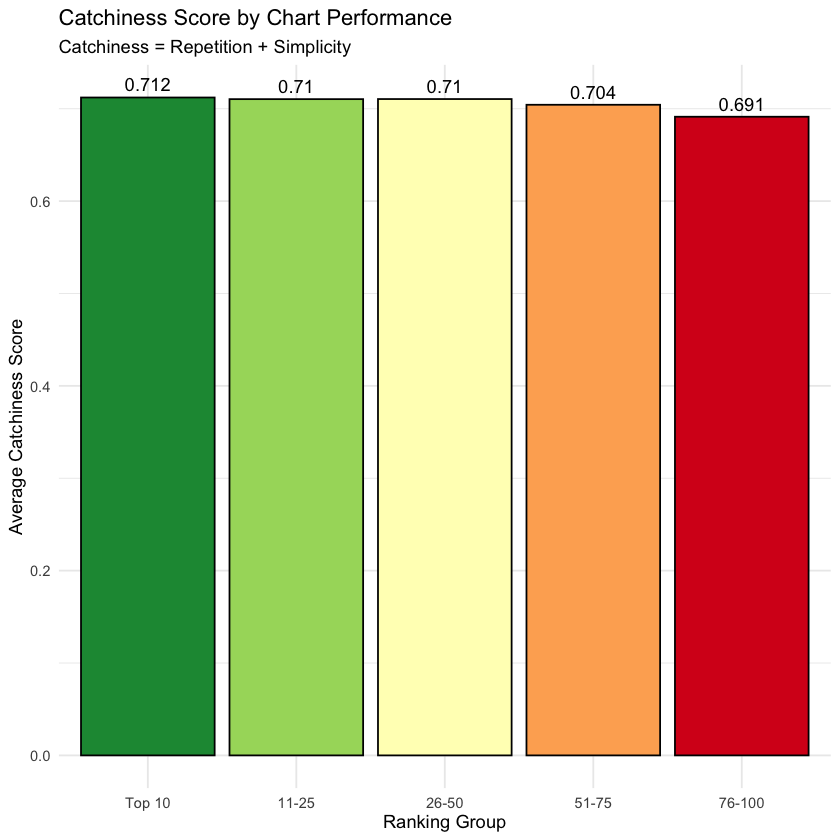

In [50]:
# Create a "Catchiness Score" combining simplicity and repetition
# Higher score = simpler + more repetitive = potentially catchier

lyrics_with_score <- lyrics_metrics %>%
  mutate(
    # Normalize metrics to 0-1 scale
    norm_repetition = (repetition_rate - min(repetition_rate, na.rm = TRUE)) / 
                      (max(repetition_rate, na.rm = TRUE) - min(repetition_rate, na.rm = TRUE)),
    norm_simplicity = 1 - ((lexical_diversity - min(lexical_diversity, na.rm = TRUE)) / 
                          (max(lexical_diversity, na.rm = TRUE) - min(lexical_diversity, na.rm = TRUE))),
    
    # Catchiness = 50% repetition + 50% simplicity
    catchiness_score = (norm_repetition * 0.5) + (norm_simplicity * 0.5)
  )

# Test correlation between catchiness and ranking
cat("\n\nCATCHINESS SCORE ANALYSIS\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n\n")

catch_cor <- cor.test(lyrics_with_score$catchiness_score, lyrics_with_score$ranking)
cat(sprintf("Correlation between Catchiness Score and Ranking:\n"))
cat(sprintf("  r = %.3f\n", catch_cor$estimate))
cat(sprintf("  p-value = %.4f %s\n\n", catch_cor$p.value,
            ifelse(catch_cor$p.value < 0.05, "*** SIGNIFICANT", "")))

if(catch_cor$estimate < 0) {
  cat("NEGATIVE correlation = Higher catchiness score → LOWER ranking number → BETTER chart position!\n")
} else {
  cat("POSITIVE correlation = Higher catchiness score → HIGHER ranking number → WORSE chart position.\n")
}

# Visualize catchiness by rank group
catchiness_by_rank <- lyrics_with_score %>%
  mutate(rank_group = case_when(
    ranking <= 10 ~ "Top 10",
    ranking <= 25 ~ "11-25",
    ranking <= 50 ~ "26-50",
    ranking <= 75 ~ "51-75",
    TRUE ~ "76-100"
  )) %>%
  group_by(rank_group) %>%
  summarise(avg_catchiness = mean(catchiness_score, na.rm = TRUE))

catchiness_by_rank$rank_group <- factor(catchiness_by_rank$rank_group,
                                       levels = c("Top 10", "11-25", "26-50", "51-75", "76-100"))

ggplot(catchiness_by_rank, aes(x = rank_group, y = avg_catchiness, fill = rank_group)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_brewer(palette = "RdYlGn", direction = -1) +
  geom_text(aes(label = round(avg_catchiness, 3)), vjust = -0.5) +
  labs(title = "Catchiness Score by Chart Performance",
       subtitle = "Catchiness = Repetition + Simplicity",
       x = "Ranking Group",
       y = "Average Catchiness Score",
       fill = "Rank Group") +
  theme_minimal() +
  theme(legend.position = "none")

# Show catchiest songs and their rankings
cat("\n\nTOP 15 CATCHIEST SONGS (High Repetition + Low Diversity):\n")
cat("=" %>% rep(70) %>% paste(collapse = ""), "\n")
catchiest <- lyrics_with_score %>%
  arrange(desc(catchiness_score)) %>%
  select(song, band_singer, year, ranking, catchiness_score, repetition_rate, lexical_diversity) %>%
  head(15)
print(catchiest)

---
## Summary of New Explorations

This notebook now includes five comprehensive analyses:

1. **Audio Feature Correlations**: Identifies relationships between musical characteristics (e.g., energy vs acousticness)

2. **Audio Features vs Chart Performance**: Statistical comparison of audio features across ranking groups to identify what makes a hit

3. **Bigrams & Phrases Analysis**: Analysis of 2-word and 3-word phrases, trending phrases by decade, and phrase differences between top hits and lower-ranked songs

4. **Energy-Valence Quadrant Analysis**: Categorizes songs into emotional quadrants (Happy Party, Angry/Intense, Calm/Peaceful, Sad/Depressing) and tracks trends over time and by chart performance

5. **Lexical Diversity & Repetition Analysis**: Tests the hypothesis that "simpler + catchier = more successful" by examining vocabulary diversity, repetition rates, word complexity, and creating a composite "catchiness score"

# Duplicate cell removed - see cell-34 for summary